# Imports

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
from scipy.stats import skew

# Load Data

In [2]:
df = pd.read_csv("archive/diabetes_012_health_indicators_BRFSS2015.csv")
df

Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...              ...     ...       ...        ...   ...     ...     ...   
253675           0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676           2.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677           0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678           0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679           2.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                        0.0           0.0     0.0  ...            1.0   
1                        0.0           1.0     0.0  ...            0.0   
2                        0.0           0.0     1.0  ...            1.0   
3                        0.0           1.0     1.0  ...            1.0   
4                        0.0           1.0     1.0  ...            1.0   
...                      ...           ...     ...  ...            ...   
253675                   0.0           0.0     1.0  ...            1.0   
253676                   0.0           0.0     0.0  ...            1.0   
253677                   0.0           1.0     1.0  ...            1.0   
253678                   0.0           0.0     1.0  ...            1.0   
253679                   1.0           1.0     1.0  ...            1.0   

        NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  \
0               0.0      5.0      18.0      15.0       1.0  0.0   9.0   
1               1.0      3.0       0.0       0.0       0.0  0.0   7.0   
2               1.0      5.0      30.0      30.0       1.0  0.0   9.0   
3               0.0      2.0       0.0       0.0       0.0  0.0  11.0   
4               0.0      2.0       3.0       0.0       0.0  0.0  11.0   
...             ...      ...       ...       ...       ...  ...   ...   
253675          0.0      3.0       0.0       5.0       0.0  1.0   5.0   
253676          0.0      4.0       0.0       0.0       1.0  0.0  11.0   
253677          0.0      1.0       0.0       0.0       0.0  0.0   2.0   
253678          0.0      3.0       0.0       0.0       0.0  1.0   7.0   
253679          0.0      2.0       0.0       0.0       0.0  0.0   9.0   

        Education  Income  
0             4.0     3.0  
1             6.0     1.0  
2             4.0     8.0  
3             3.0     6.0  
4             5.0     4.0  
...           ...     ...  
253675        6.0     7.0  
253676        2.0     4.0  
253677        5.0     2.0  
253678        5.0     1.0  
253679        6.0     2.0  

[253680 rows x 22 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [4]:
df.describe()

Diabetes_012         HighBP       HighChol      CholCheck  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        0.296921       0.429001       0.424121       0.962670   
std         0.698160       0.494934       0.494210       0.189571   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       1.000000   
50%         0.000000       0.000000       0.000000       1.000000   
75%         0.000000       1.000000       1.000000       1.000000   
max         2.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  253680.000000  253680.000000  253680.000000         253680.000000   
mean       28.382364       0.443169       0.040571              0.094186   
std         6.608694       0.496761       0.197294              0.292087   
min        12.000000       0.000000       0.000000              0.000000   
25%        24.000000       0.000000       0.000000              0.000000   
50%        27.000000       0.000000       0.000000              0.000000   
75%        31.000000       1.000000       0.000000              0.000000   
max        98.000000       1.000000       1.000000              1.000000   

        PhysActivity         Fruits  ...  AnyHealthcare    NoDocbcCost  \
count  253680.000000  253680.000000  ...  253680.000000  253680.000000   
mean        0.756544       0.634256  ...       0.951053       0.084177   
std         0.429169       0.481639  ...       0.215759       0.277654   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         1.000000       0.000000  ...       1.000000       0.000000   
50%         1.000000       1.000000  ...       1.000000       0.000000   
75%         1.000000       1.000000  ...       1.000000       0.000000   
max         1.000000       1.000000  ...       1.000000       1.000000   

             GenHlth       MentHlth       PhysHlth       DiffWalk  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        2.511392       3.184772       4.242081       0.168224   
std         1.068477       7.412847       8.717951       0.374066   
min         1.000000       0.000000       0.000000       0.000000   
25%         2.000000       0.000000       0.000000       0.000000   
50%         2.000000       0.000000       0.000000       0.000000   
75%         3.000000       2.000000       3.000000       0.000000   
max         5.000000      30.000000      30.000000       1.000000   

                 Sex            Age      Education         Income  
count  253680.000000  253680.000000  253680.000000  253680.000000  
mean        0.440342       8.032119       5.050434       6.053875  
std         0.496429       3.054220       0.985774       2.071148  
min         0.000000       1.000000       1.000000       1.000000  
25%         0.000000       6.000000       4.000000       5.000000  
50%         0.000000       8.000000       5.000000       7.000000  
75%         1.000000      10.000000       6.000000       8.000000  
max         1.000000      13.000000       6.000000       8.000000  

[8 rows x 22 columns]

In [5]:
df_modded = df.copy()

# Visualize Distributions

## Functions

In [6]:
def view_binary(df,column):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # Histogram
    axes[0].hist(df[column], bins=2, color='skyblue', edgecolor='black')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('Histogram')

    # Stacked Histogram
    axes[1].hist([df[df['Diabetes_012'] == 0][column], df[df['Diabetes_012'] == 1][column], df[df['Diabetes_012'] == 2][column]], 
                 bins=2, alpha=0.7, label=['Non-Diabetic', 'Prediabetic', 'Diabetic'], stacked=True, color=['skyblue','red','green'], edgecolor='black')
    axes[1].set_xlabel(column)
    axes[1].set_ylabel('Frequency')
    axes[1].set_title('Histogram')

    plt.tight_layout()
    plt.legend()
    plt.show()


In [7]:
def view_continuous(df,column,bins=30):
    fig, axes = plt.subplots(1, 4, figsize=(18, 4))
    
    # Boxplot
    axes[0].boxplot(df[column])
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Value')
    axes[0].set_title('Boxplot')

    # Histogram
    axes[1].hist(df[column], bins=bins, color='skyblue', edgecolor='black')
    axes[1].set_xlabel(column)
    axes[1].set_ylabel('Frequency')
    axes[1].set_title('Histogram')
    
    # Boxplot
    axes[2].boxplot([df[df['Diabetes_012'] == 0][column], df[df['Diabetes_012'] == 1][column], df[df['Diabetes_012'] == 2][column]], tick_labels=['Non-Diabetic', 'Prediabetic', 'Diabetic'])
    axes[2].set_xlabel(column)
    axes[2].set_ylabel('Value')
    axes[2].set_title('Boxplot')

    # Stacked Histogram
    axes[3].hist([df[df['Diabetes_012'] == 0][column], df[df['Diabetes_012'] == 1][column], df[df['Diabetes_012'] == 2][column]], 
                 bins=bins, alpha=0.7, label=['Non-Diabetic', 'Prediabetic', 'Diabetic'], stacked=True, color=['skyblue','red','green'], edgecolor='black')
    axes[3].set_xlabel(column)
    axes[3].set_ylabel('Frequency')
    axes[3].set_title('Histogram')

    
    
    plt.tight_layout()
    plt.legend(['Non-Diabetic', 'Prediabetic', 'Diabetic'])
    plt.show()

In [8]:
def col_summary(df,column):
    print("Mean: {}".format(df[column].mean()))
    print("Standard Deviation: {}".format(df[column].std()))
    print("Median: {}".format(df[column].median()))
    print("Min: {}".format(df[column].min()))
    print("Max: {}".format(df[column].max()))

In [9]:
def draw_heat_graph(df):
    plt.figure(figsize=(20, 20))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
    plt.title(f"Heatmap for dataframe")
    plt.show()

Green is for diabetic, blue is non-diabetic, red is prediabetic

## Binary

### Diabetes

Obviously the distributions for the Diabetes_012 column is not uniform

(array([213703.,   4631.,  35346.]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <BarContainer object of 3 artists>)

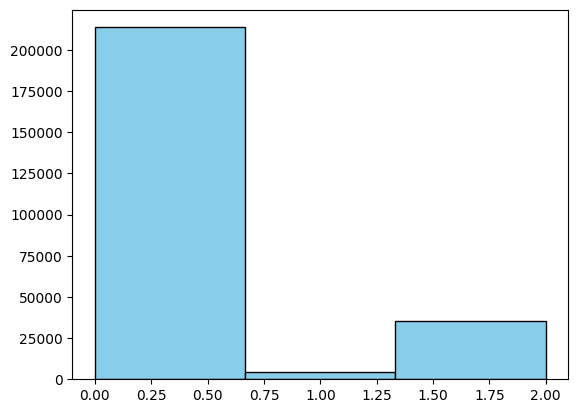

In [10]:
# Generate random data for the histogram
data_diabetes = df['Diabetes_012']
 
# Plotting a basic histogram
plt.hist(data_diabetes, bins=3, color='skyblue', edgecolor='black')

### High Blood Pressure

Most diabetics and prediabetics have high blood pressure

Having high blood pressure tend to be more likely to have diabetes and prediabetes

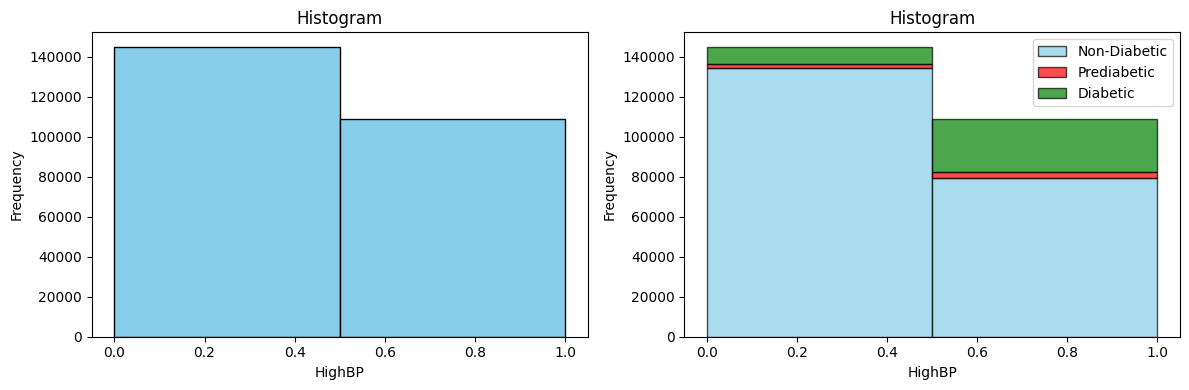

In [11]:
view_binary(df,'HighBP')

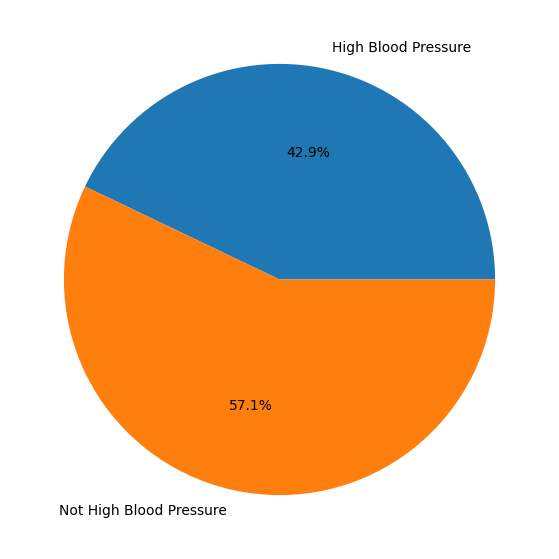

In [12]:
labels = ['High Blood Pressure', 'Not High Blood Pressure']
data = [len(df[df['HighBP']==1]),len(df[df['HighBP']==0])]

fig = plt.figure(figsize=(10, 7))
plt.pie(data, labels=labels,autopct='%1.1f%%')

# show plot
plt.show()

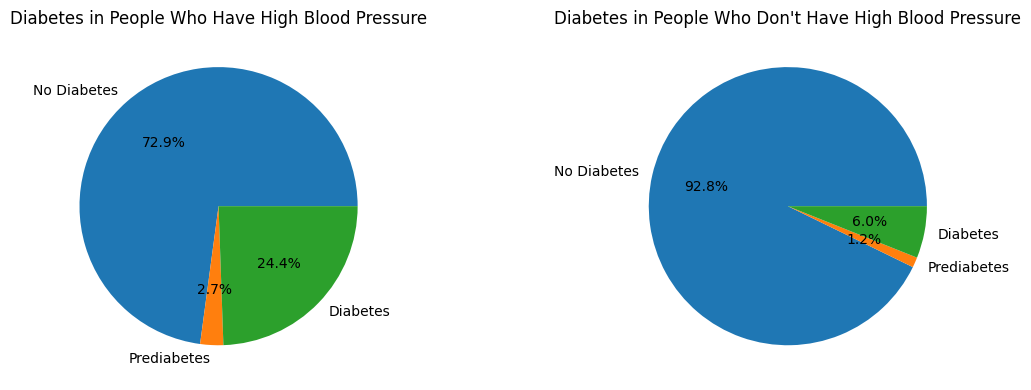

In [13]:
labels = ['No Diabetes','Prediabetes','Diabetes']
data_1 = [len(df[(df['HighBP']==1) & (df['Diabetes_012'] == 0)]),len(df[(df['HighBP']==1) & (df['Diabetes_012'] == 1)]), len(df[(df['HighBP']==1) & (df['Diabetes_012'] == 2)])]
data_2 = [len(df[(df['HighBP']==0) & (df['Diabetes_012'] == 0)]),len(df[(df['HighBP']==0) & (df['Diabetes_012'] == 1)]), len(df[(df['HighBP']==0) & (df['Diabetes_012'] == 2)])]


fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    

axes[0].pie(data_1, labels=labels,autopct='%1.1f%%')
axes[0].set_title('Diabetes in People Who Have High Blood Pressure')


axes[1].pie(data_2, labels=labels,autopct='%1.1f%%')
axes[1].set_title('Diabetes in People Who Don\'t Have High Blood Pressure')

plt.tight_layout()
plt.show()

In [14]:
print (df[df.HighBP == 1].shape[0])
print (df[df.HighBP == 0].shape[0])
print ("Difference between the two values is {}".format(abs(df[df.HighBP == 1].shape[0] - df[df.HighBP == 0].shape[0])))

108829
144851
Difference between the two values is 36022


### High Cholesterol

Most diabetics and prediabetics have high cholesterol

High cholesterol increases risk of diabetes and prediabetes

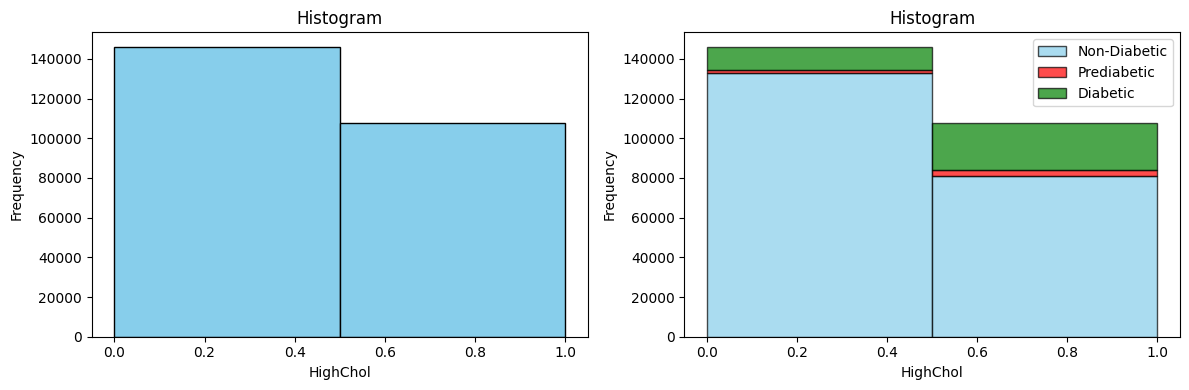

In [15]:
view_binary(df,'HighChol')

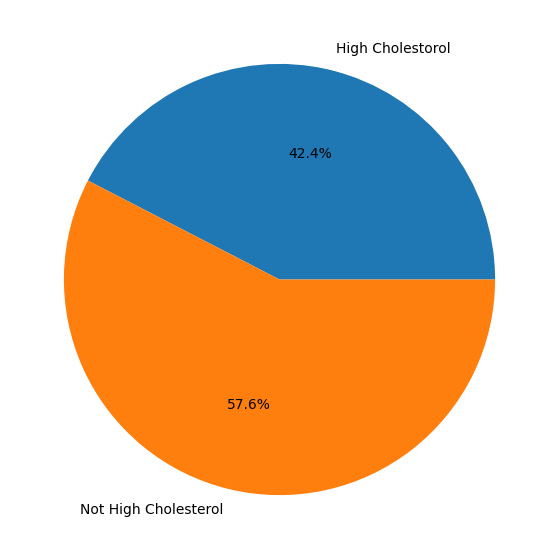

In [16]:
labels = ['High Cholestorol', 'Not High Cholesterol']
data = [len(df[df['HighChol']==1]),len(df[df['HighChol']==0])]

fig = plt.figure(figsize=(10, 7))
plt.pie(data, labels=labels,autopct='%1.1f%%')

# show plot
plt.show()

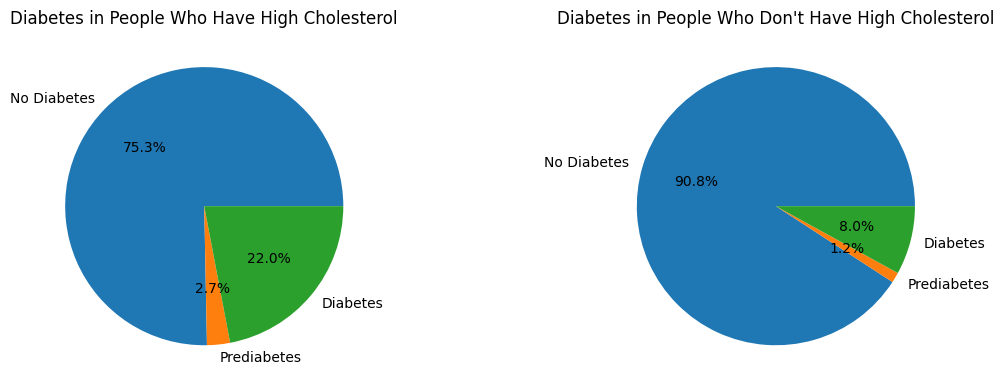

In [17]:
labels = ['No Diabetes','Prediabetes','Diabetes']
data_1 = [len(df[(df['HighChol']==1) & (df['Diabetes_012'] == 0)]),len(df[(df['HighChol']==1) & (df['Diabetes_012'] == 1)]), len(df[(df['HighChol']==1) & (df['Diabetes_012'] == 2)])]
data_2 = [len(df[(df['HighChol']==0) & (df['Diabetes_012'] == 0)]),len(df[(df['HighChol']==0) & (df['Diabetes_012'] == 1)]), len(df[(df['HighChol']==0) & (df['Diabetes_012'] == 2)])]


fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    

axes[0].pie(data_1, labels=labels,autopct='%1.1f%%')
axes[0].set_title('Diabetes in People Who Have High Cholesterol')


axes[1].pie(data_2, labels=labels,autopct='%1.1f%%')
axes[1].set_title('Diabetes in People Who Don\'t Have High Cholesterol')

plt.tight_layout()
plt.show()

In [18]:
print (df[df.HighChol == 1].shape[0])
print (df[df.HighChol == 0].shape[0])
print ("Difference between the two values is {}".format(abs(df[df.HighChol == 1].shape[0] - df[df.HighChol == 0].shape[0])))

107591
146089
Difference between the two values is 38498


### Cholesterol Check 
#### (Has the person checked their cholesterol in the last 5 years?)

People who checked their cholesterol in the last 5 years are more likely to have diabetes or prediabetes

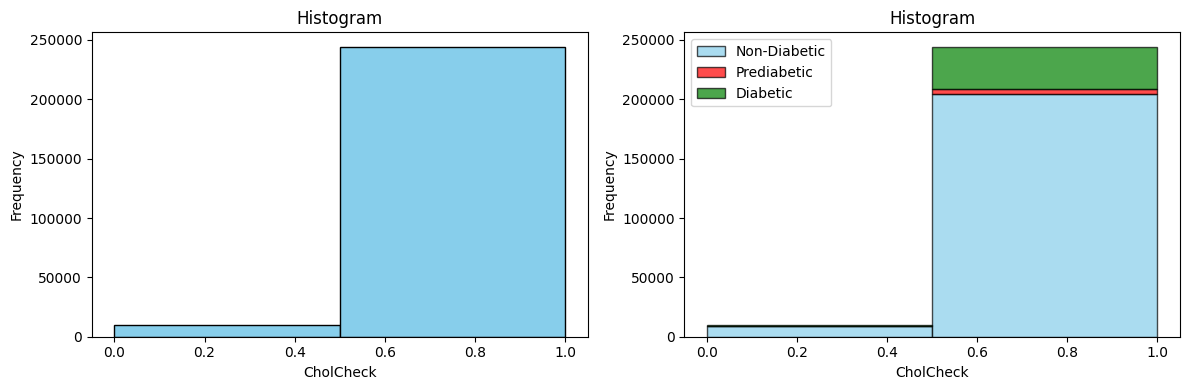

In [19]:
view_binary(df,'CholCheck')

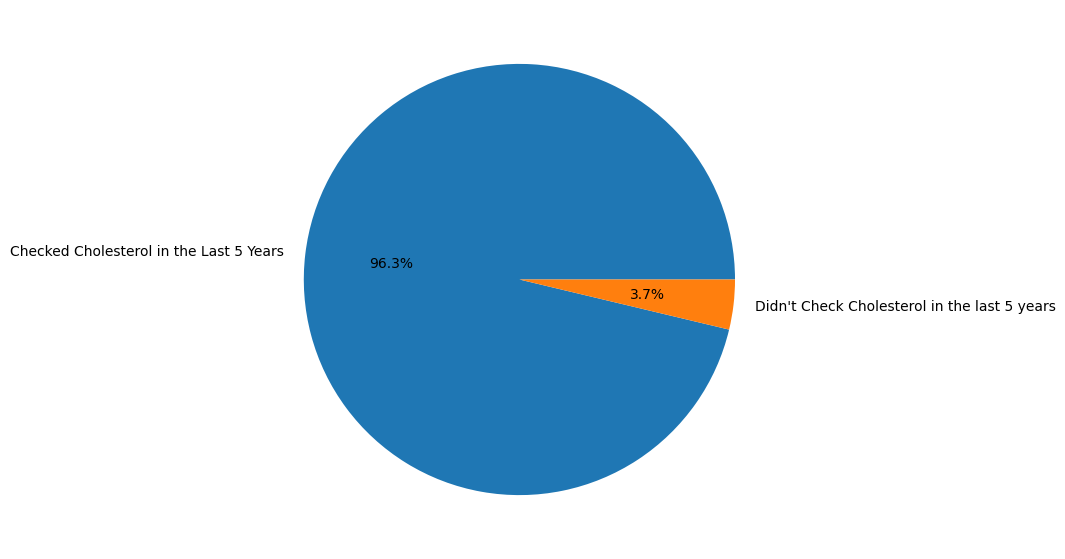

In [20]:
labels = ['Checked Cholesterol in the Last 5 Years', 'Didn\'t Check Cholesterol in the last 5 years']
data = [len(df[df['CholCheck']==1]),len(df[df['CholCheck']==0])]

fig = plt.figure(figsize=(10, 7))
plt.pie(data, labels=labels,autopct='%1.1f%%')

# show plot
plt.show()

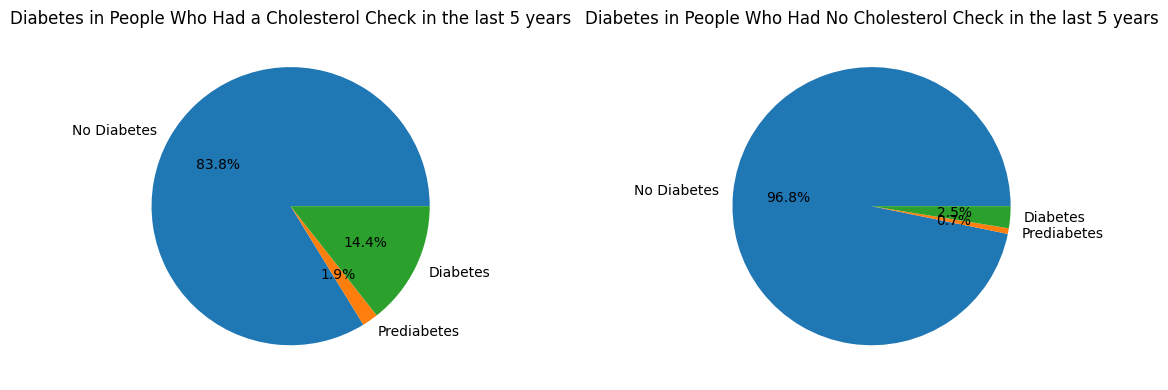

In [21]:
labels = ['No Diabetes','Prediabetes','Diabetes']
data_1 = [len(df[(df['CholCheck']==1) & (df['Diabetes_012'] == 0)]),len(df[(df['CholCheck']==1) & (df['Diabetes_012'] == 1)]), len(df[(df['CholCheck']==1) & (df['Diabetes_012'] == 2)])]
data_2 = [len(df[(df['CholCheck']==0) & (df['Diabetes_012'] == 0)]),len(df[(df['CholCheck']==0) & (df['Diabetes_012'] == 1)]), len(df[(df['CholCheck']==0) & (df['Diabetes_012'] == 2)])]


fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    

axes[0].pie(data_1, labels=labels,autopct='%1.1f%%')
axes[0].set_title('Diabetes in People Who Had a Cholesterol Check in the last 5 years')


axes[1].pie(data_2, labels=labels,autopct='%1.1f%%')
axes[1].set_title('Diabetes in People Who Had No Cholesterol Check in the last 5 years')

plt.tight_layout()
plt.show()

In [22]:
print (df[df.CholCheck == 1].shape[0])
print (df[df.CholCheck == 0].shape[0])
print ("Difference between the two values is {}".format(abs(df[df.CholCheck == 1].shape[0] - df[df.CholCheck == 0].shape[0])))

244210
9470
Difference between the two values is 234740


### Stroke

People with strokes are at a much higher risk of developing diabetes or prediabetes

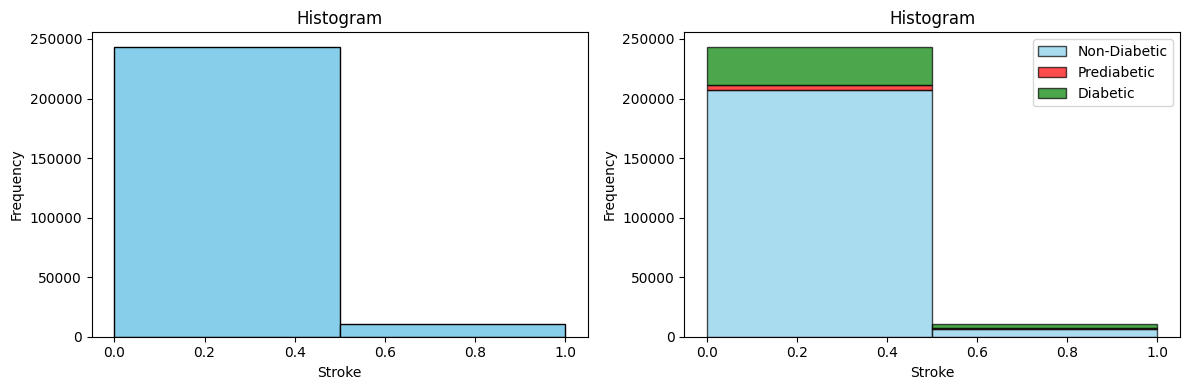

In [23]:
view_binary(df,'Stroke')

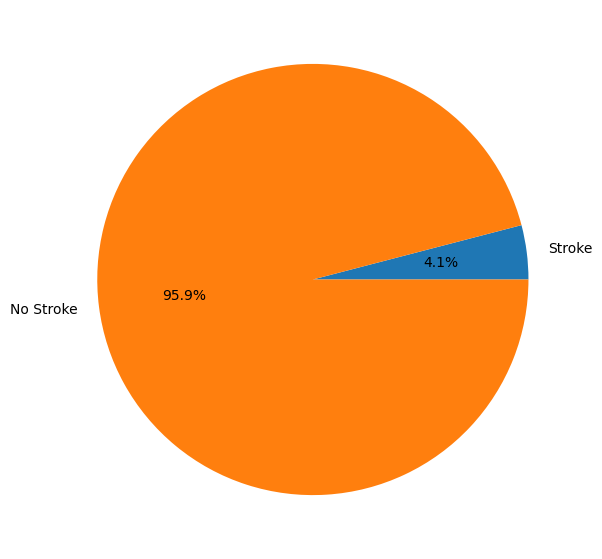

In [24]:
labels = ['Stroke', 'No Stroke']
data = [len(df[df['Stroke']==1]),len(df[df['Stroke']==0])]

fig = plt.figure(figsize=(10, 7))
plt.pie(data, labels=labels,autopct='%1.1f%%')

# show plot
plt.show()

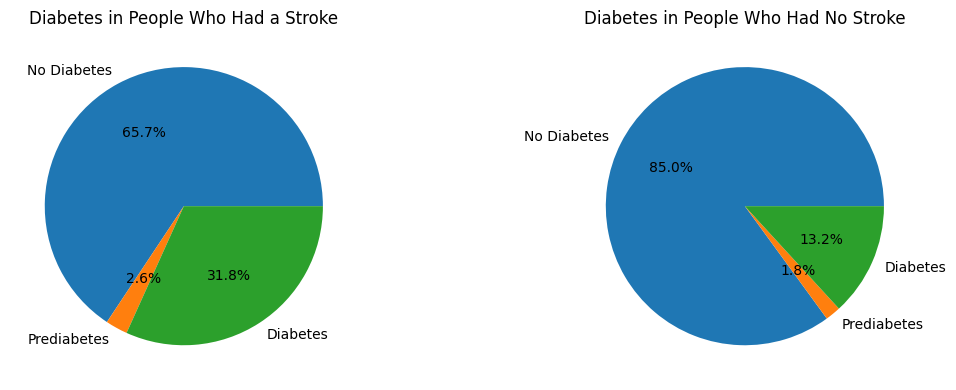

In [25]:
labels = ['No Diabetes','Prediabetes','Diabetes']
data_1 = [len(df[(df['Stroke']==1) & (df['Diabetes_012'] == 0)]),len(df[(df['Stroke']==1) & (df['Diabetes_012'] == 1)]), len(df[(df['Stroke']==1) & (df['Diabetes_012'] == 2)])]
data_2 = [len(df[(df['Stroke']==0) & (df['Diabetes_012'] == 0)]),len(df[(df['Stroke']==0) & (df['Diabetes_012'] == 1)]), len(df[(df['Stroke']==0) & (df['Diabetes_012'] == 2)])]


fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    

axes[0].pie(data_1, labels=labels,autopct='%1.1f%%')
axes[0].set_title('Diabetes in People Who Had a Stroke')


axes[1].pie(data_2, labels=labels,autopct='%1.1f%%')
axes[1].set_title('Diabetes in People Who Had No Stroke')

plt.tight_layout()
plt.show()

In [26]:
print (df[df.Stroke == 1].shape[0])
print (df[df.Stroke == 0].shape[0])
print ("Difference between the two values is {}".format(abs(df[df.Stroke == 1].shape[0] - df[df.Stroke == 0].shape[0])))

10292
243388
Difference between the two values is 233096


### Heart Disease or Attack

Heart diseases or attacks increae likelihood of diabetes and prediabetes

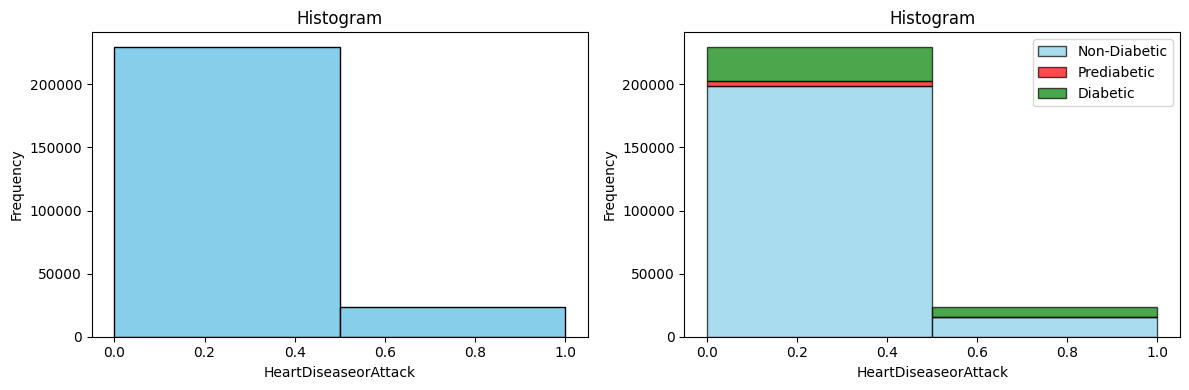

In [27]:
view_binary(df,'HeartDiseaseorAttack')

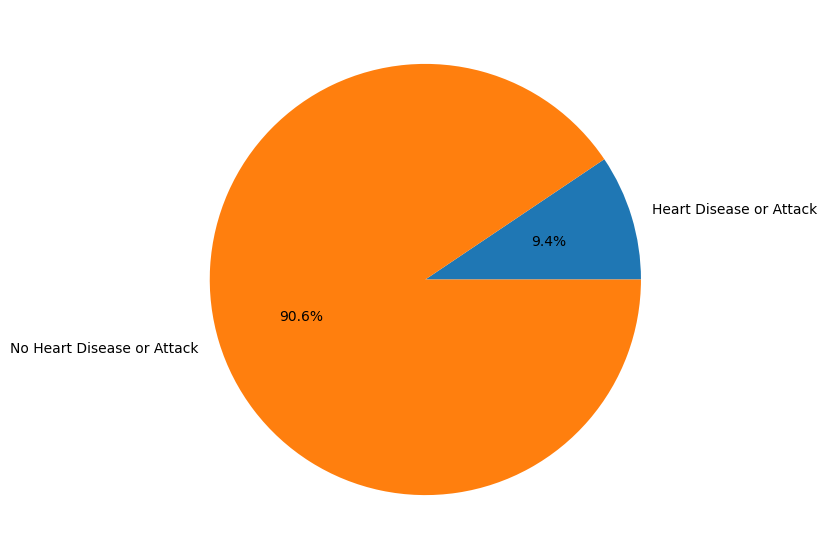

In [28]:
labels = ['Heart Disease or Attack', 'No Heart Disease or Attack']
data = [len(df[df['HeartDiseaseorAttack']==1]),len(df[df['HeartDiseaseorAttack']==0])]

fig = plt.figure(figsize=(10, 7))
plt.pie(data, labels=labels,autopct='%1.1f%%')

# show plot
plt.show()

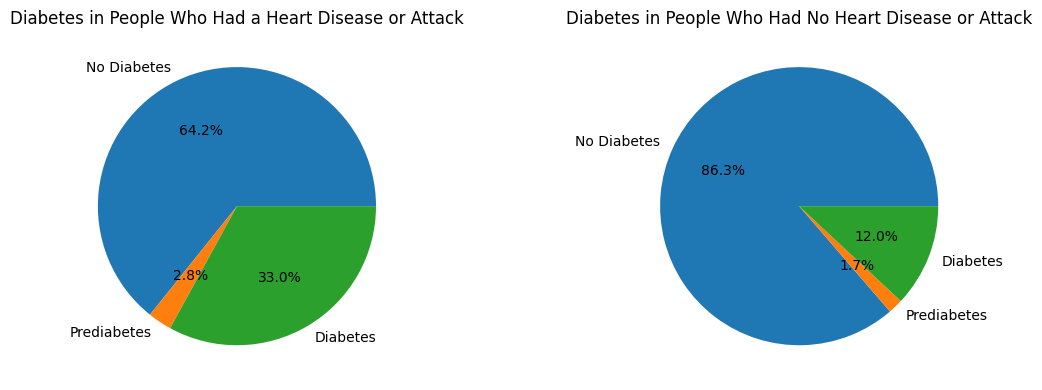

In [29]:
labels = ['No Diabetes','Prediabetes','Diabetes']
data_1 = [len(df[(df['HeartDiseaseorAttack']==1) & (df['Diabetes_012'] == 0)]),len(df[(df['HeartDiseaseorAttack']==1) & (df['Diabetes_012'] == 1)]), len(df[(df['HeartDiseaseorAttack']==1) & (df['Diabetes_012'] == 2)])]
data_2 = [len(df[(df['HeartDiseaseorAttack']==0) & (df['Diabetes_012'] == 0)]),len(df[(df['HeartDiseaseorAttack']==0) & (df['Diabetes_012'] == 1)]), len(df[(df['HeartDiseaseorAttack']==0) & (df['Diabetes_012'] == 2)])]


fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    

axes[0].pie(data_1, labels=labels,autopct='%1.1f%%')
axes[0].set_title('Diabetes in People Who Had a Heart Disease or Attack')


axes[1].pie(data_2, labels=labels,autopct='%1.1f%%')
axes[1].set_title('Diabetes in People Who Had No Heart Disease or Attack')

plt.tight_layout()
plt.show()

In [30]:
print (df[df.HeartDiseaseorAttack == 1].shape[0])
print (df[df.HeartDiseaseorAttack == 0].shape[0])
print ("Difference between the two values is {}".format(abs(df[df.HeartDiseaseorAttack == 1].shape[0] - df[df.HeartDiseaseorAttack == 0].shape[0])))

23893
229787
Difference between the two values is 205894


### Physical Activity in the Last 30 Days

Physical activity reduces chances of having diabetes

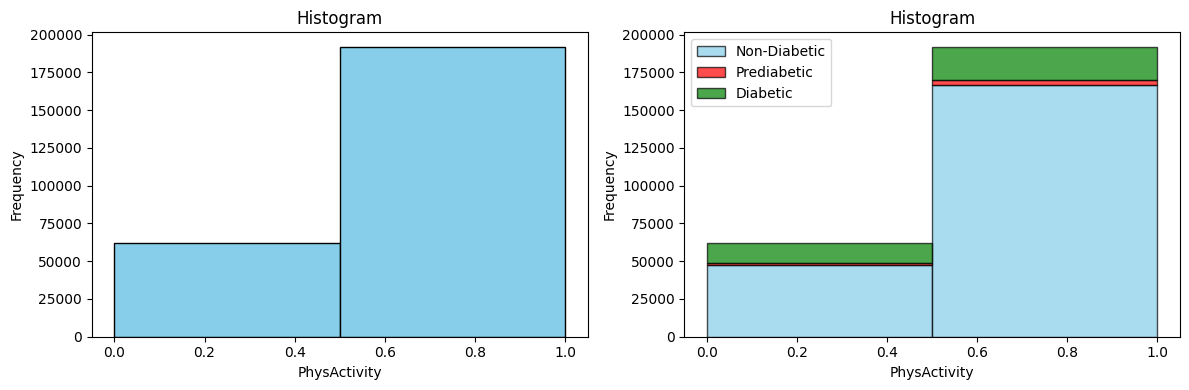

In [31]:
view_binary(df,'PhysActivity')

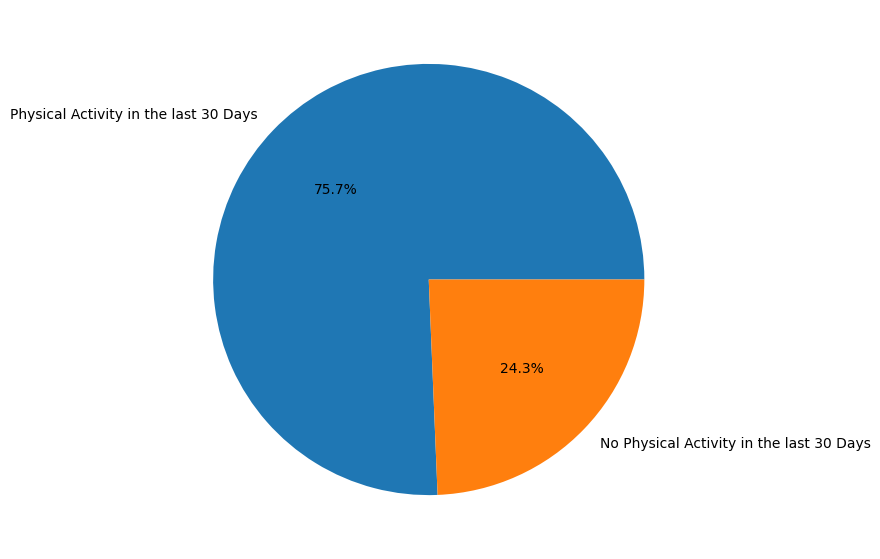

In [32]:
labels = ['Physical Activity in the last 30 Days', 'No Physical Activity in the last 30 Days']
data = [len(df[df['PhysActivity']==1]),len(df[df['PhysActivity']==0])]

fig = plt.figure(figsize=(10, 7))
plt.pie(data, labels=labels,autopct='%1.1f%%')

# show plot
plt.show()

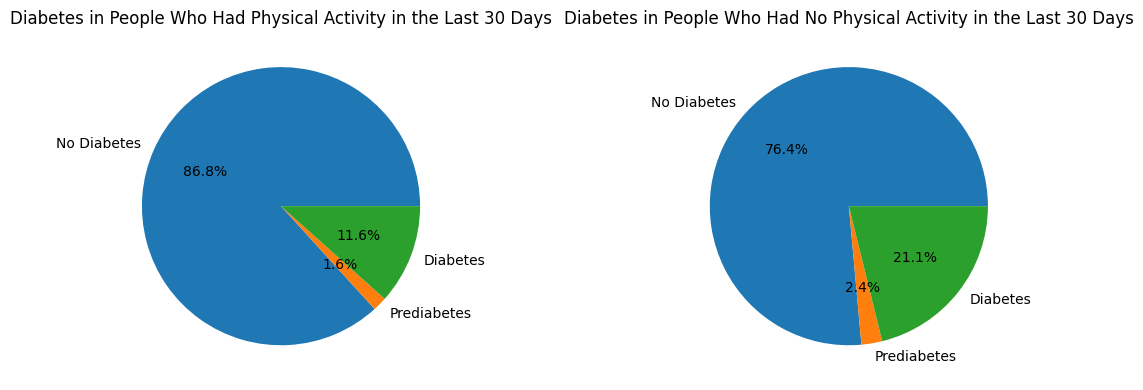

In [33]:
labels = ['No Diabetes','Prediabetes','Diabetes']
data_1 = [len(df[(df['PhysActivity']==1) & (df['Diabetes_012'] == 0)]),len(df[(df['PhysActivity']==1) & (df['Diabetes_012'] == 1)]), len(df[(df['PhysActivity']==1) & (df['Diabetes_012'] == 2)])]
data_2 = [len(df[(df['PhysActivity']==0) & (df['Diabetes_012'] == 0)]),len(df[(df['PhysActivity']==0) & (df['Diabetes_012'] == 1)]), len(df[(df['PhysActivity']==0) & (df['Diabetes_012'] == 2)])]


fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    

axes[0].pie(data_1, labels=labels,autopct='%1.1f%%')
axes[0].set_title('Diabetes in People Who Had Physical Activity in the Last 30 Days')


axes[1].pie(data_2, labels=labels,autopct='%1.1f%%')
axes[1].set_title('Diabetes in People Who Had No Physical Activity in the Last 30 Days')

plt.tight_layout()
plt.show()

### Consume Fruits One or More Times a Day

Eating fruits daily slightly reduces chances of having diabetes and prediabetes

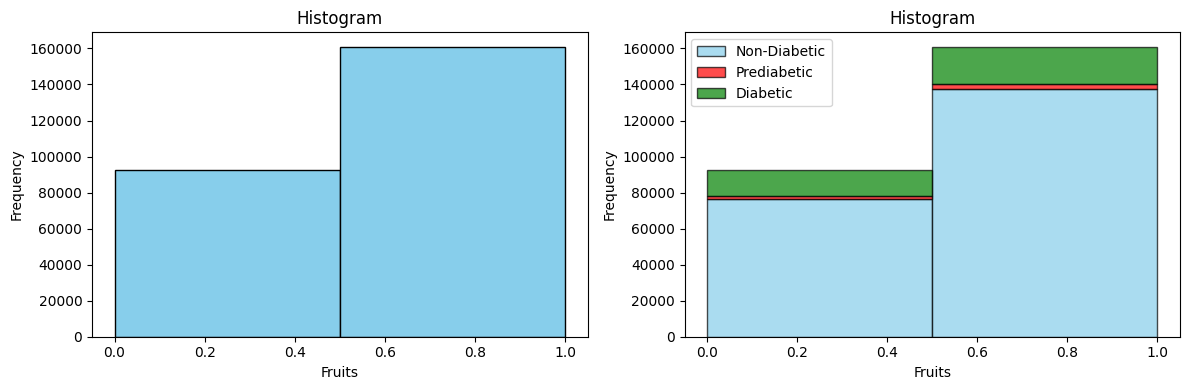

In [34]:
view_binary(df,'Fruits')

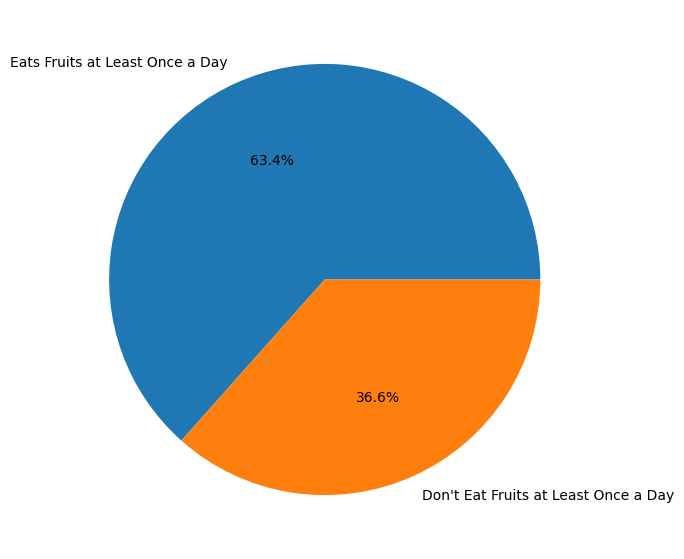

In [35]:
labels = ['Eats Fruits at Least Once a Day', 'Don\'t Eat Fruits at Least Once a Day']
data = [len(df[df['Fruits']==1]),len(df[df['Fruits']==0])]

fig = plt.figure(figsize=(10, 7))
plt.pie(data, labels=labels,autopct='%1.1f%%')

# show plot
plt.show()

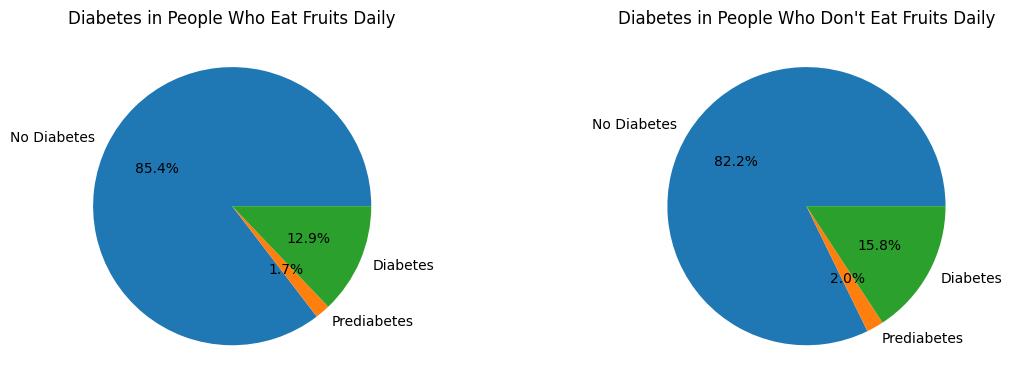

In [36]:
labels = ['No Diabetes','Prediabetes','Diabetes']
data_1 = [len(df[(df['Fruits']==1) & (df['Diabetes_012'] == 0)]),len(df[(df['Fruits']==1) & (df['Diabetes_012'] == 1)]), len(df[(df['Fruits']==1) & (df['Diabetes_012'] == 2)])]
data_2 = [len(df[(df['Fruits']==0) & (df['Diabetes_012'] == 0)]),len(df[(df['Fruits']==0) & (df['Diabetes_012'] == 1)]), len(df[(df['Fruits']==0) & (df['Diabetes_012'] == 2)])]


fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    

axes[0].pie(data_1, labels=labels,autopct='%1.1f%%')
axes[0].set_title('Diabetes in People Who Eat Fruits Daily')


axes[1].pie(data_2, labels=labels,autopct='%1.1f%%')
axes[1].set_title('Diabetes in People Who Don\'t Eat Fruits Daily')

plt.tight_layout()
plt.show()

### Consume Veggies One or More Times a Day

Eating vegetables daily reduces risk of diabetes and prediabetes

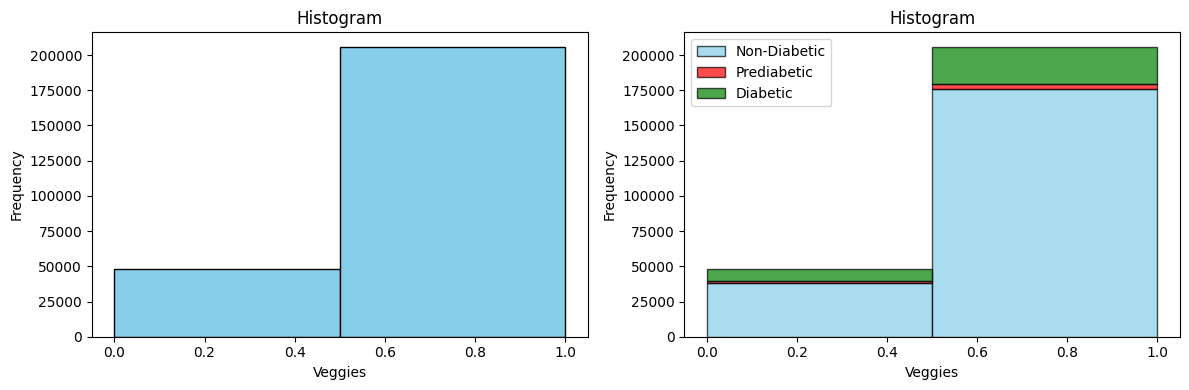

In [37]:
view_binary(df,'Veggies')

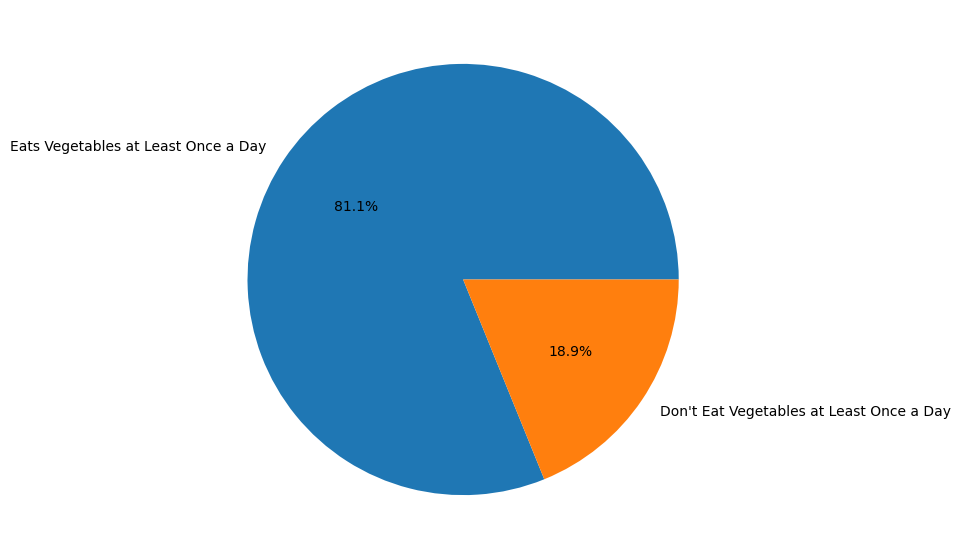

In [38]:
labels = ['Eats Vegetables at Least Once a Day', 'Don\'t Eat Vegetables at Least Once a Day']
data = [len(df[df['Veggies']==1]),len(df[df['Veggies']==0])]

fig = plt.figure(figsize=(10, 7))
plt.pie(data, labels=labels,autopct='%1.1f%%')

# show plot
plt.show()

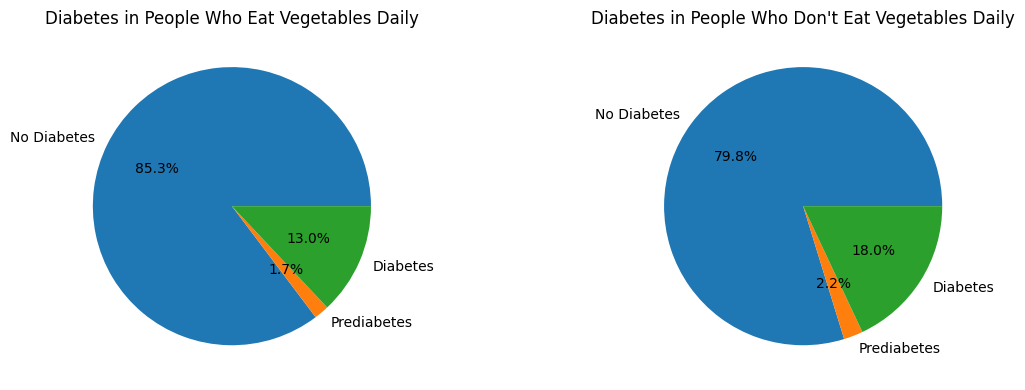

In [39]:
labels = ['No Diabetes','Prediabetes','Diabetes']
data_1 = [len(df[(df['Veggies']==1) & (df['Diabetes_012'] == 0)]),len(df[(df['Veggies']==1) & (df['Diabetes_012'] == 1)]), len(df[(df['Veggies']==1) & (df['Diabetes_012'] == 2)])]
data_2 = [len(df[(df['Veggies']==0) & (df['Diabetes_012'] == 0)]),len(df[(df['Veggies']==0) & (df['Diabetes_012'] == 1)]), len(df[(df['Veggies']==0) & (df['Diabetes_012'] == 2)])]


fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    

axes[0].pie(data_1, labels=labels,autopct='%1.1f%%')
axes[0].set_title('Diabetes in People Who Eat Vegetables Daily')


axes[1].pie(data_2, labels=labels,autopct='%1.1f%%')
axes[1].set_title('Diabetes in People Who Don\'t Eat Vegetables Daily')

plt.tight_layout()
plt.show()

In [40]:
print (df[df.Veggies == 1].shape[0])
print (df[df.Veggies == 0].shape[0])
print ("Difference between the two values is {}".format(abs(df[df.Veggies == 1].shape[0] - df[df.Veggies == 0].shape[0])))

205841
47839
Difference between the two values is 158002


### Heavy drinkers 
#### (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)

Heavy drinkers are less likely to have diabetes and prediabetes (the latter by a small margin)

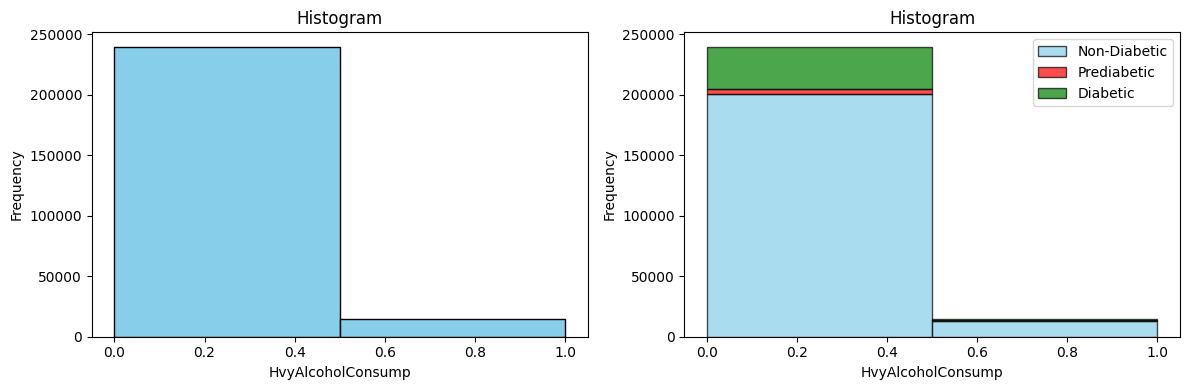

In [41]:
view_binary(df,'HvyAlcoholConsump')

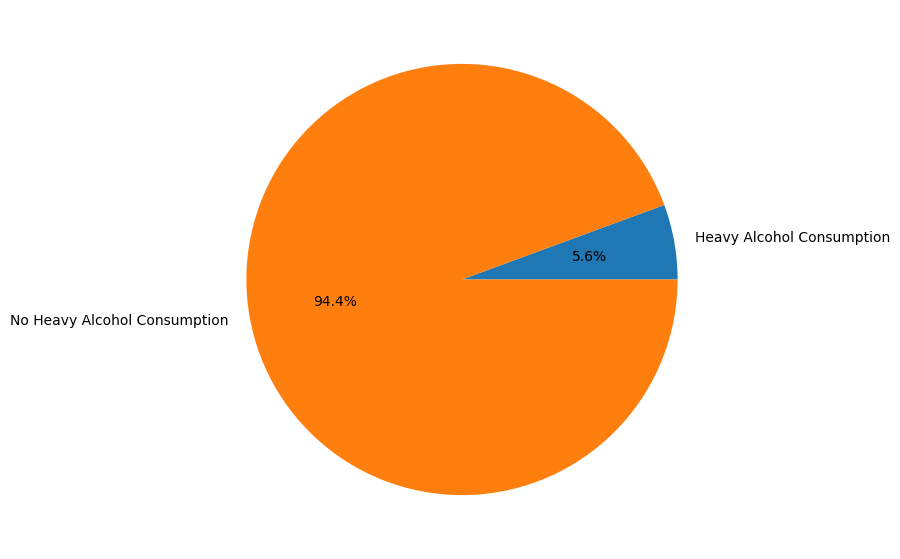

In [42]:
labels = ['Heavy Alcohol Consumption', 'No Heavy Alcohol Consumption']
data = [len(df[df['HvyAlcoholConsump']==1]),len(df[df['HvyAlcoholConsump']==0])]

fig = plt.figure(figsize=(10, 7))
plt.pie(data, labels=labels,autopct='%1.1f%%')

# show plot
plt.show()

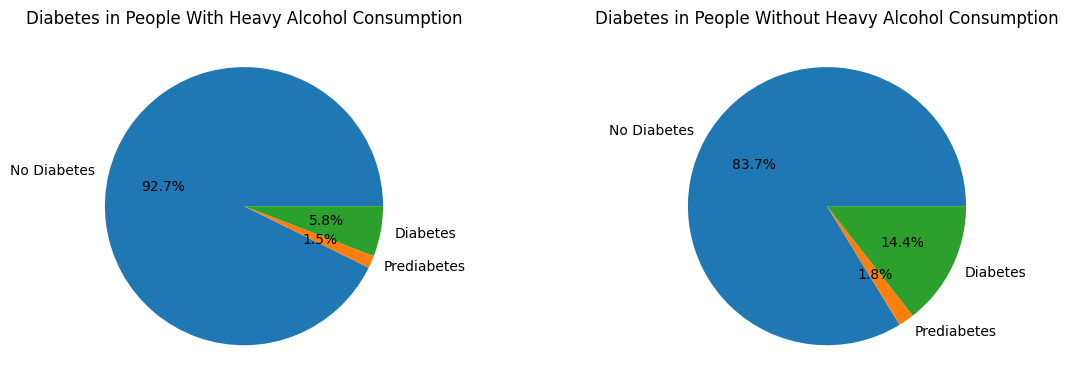

In [43]:
labels = ['No Diabetes','Prediabetes','Diabetes']
data_1 = [len(df[(df['HvyAlcoholConsump']==1) & (df['Diabetes_012'] == 0)]),len(df[(df['HvyAlcoholConsump']==1) & (df['Diabetes_012'] == 1)]), len(df[(df['HvyAlcoholConsump']==1) & (df['Diabetes_012'] == 2)])]
data_2 = [len(df[(df['HvyAlcoholConsump']==0) & (df['Diabetes_012'] == 0)]),len(df[(df['HvyAlcoholConsump']==0) & (df['Diabetes_012'] == 1)]), len(df[(df['HvyAlcoholConsump']==0) & (df['Diabetes_012'] == 2)])]


fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    

axes[0].pie(data_1, labels=labels,autopct='%1.1f%%')
axes[0].set_title('Diabetes in People With Heavy Alcohol Consumption')


axes[1].pie(data_2, labels=labels,autopct='%1.1f%%')
axes[1].set_title('Diabetes in People Without Heavy Alcohol Consumption')

plt.tight_layout()
plt.show()

In [44]:
print (df[df.HvyAlcoholConsump == 1].shape[0])
print (df[df.HvyAlcoholConsump == 0].shape[0])
print ("Difference between the two values is {}".format(abs(df[df.HvyAlcoholConsump == 1].shape[0] - df[df.HvyAlcoholConsump == 0].shape[0])))

14256
239424
Difference between the two values is 225168


### Any Healthcare
#### Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes

Somehow, people without healthcare are slightly less likely to develop diabetes, but slightly more likely to have prediabetes

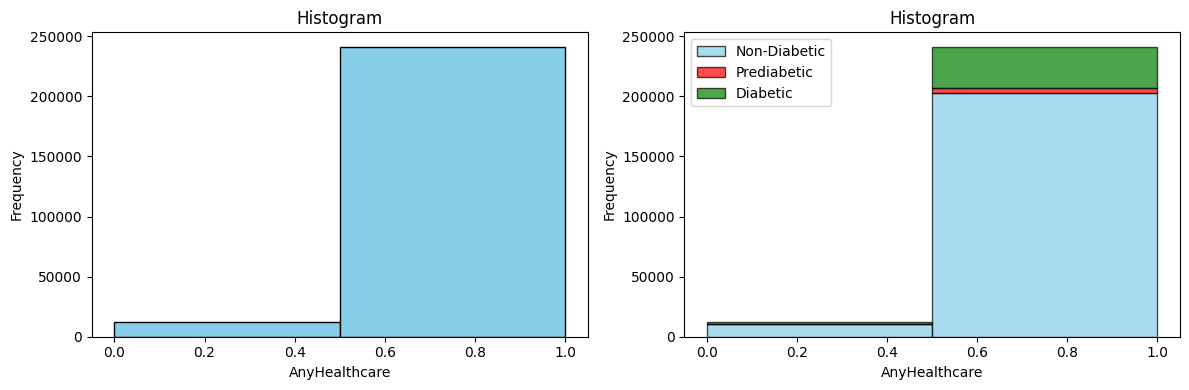

In [45]:
view_binary(df,'AnyHealthcare')

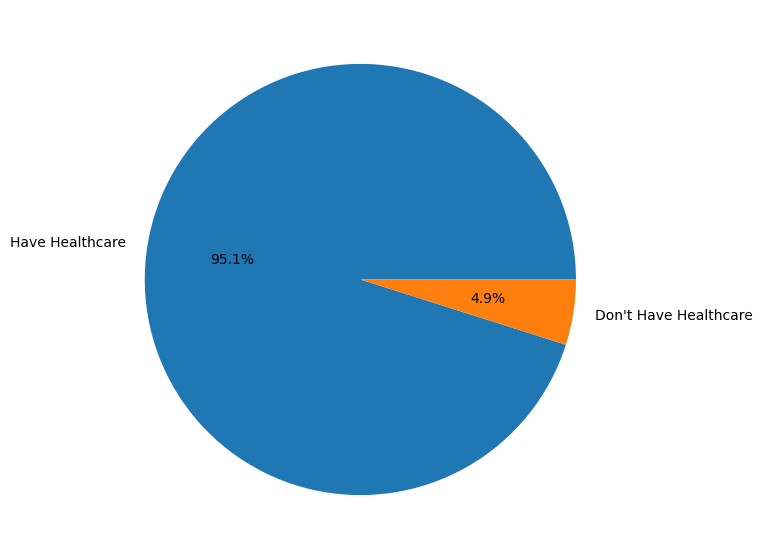

In [46]:
labels = ['Have Healthcare', 'Don\'t Have Healthcare']
data = [len(df[df['AnyHealthcare']==1]),len(df[df['AnyHealthcare']==0])]

fig = plt.figure(figsize=(10, 7))
plt.pie(data, labels=labels,autopct='%1.1f%%')

# show plot
plt.show()

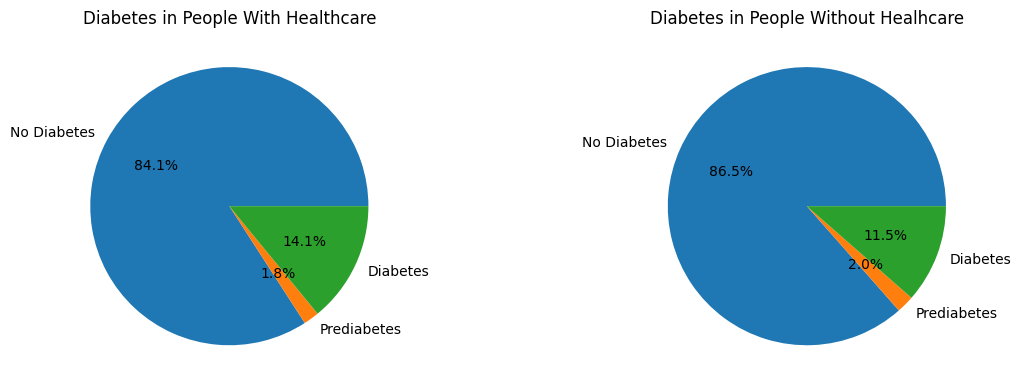

In [47]:
labels = ['No Diabetes','Prediabetes','Diabetes']
data_1 = [len(df[(df['AnyHealthcare']==1) & (df['Diabetes_012'] == 0)]),len(df[(df['AnyHealthcare']==1) & (df['Diabetes_012'] == 1)]), len(df[(df['AnyHealthcare']==1) & (df['Diabetes_012'] == 2)])]
data_2 = [len(df[(df['AnyHealthcare']==0) & (df['Diabetes_012'] == 0)]),len(df[(df['AnyHealthcare']==0) & (df['Diabetes_012'] == 1)]), len(df[(df['AnyHealthcare']==0) & (df['Diabetes_012'] == 2)])]


fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    

axes[0].pie(data_1, labels=labels,autopct='%1.1f%%')
axes[0].set_title('Diabetes in People With Healthcare')


axes[1].pie(data_2, labels=labels,autopct='%1.1f%%')
axes[1].set_title('Diabetes in People Without Healhcare')

plt.tight_layout()
plt.show()

In [48]:
print (df[df.AnyHealthcare == 1].shape[0])
print (df[df.AnyHealthcare == 0].shape[0])
print ("Difference between the two values is {}".format(abs(df[df.AnyHealthcare == 1].shape[0] - df[df.AnyHealthcare == 0].shape[0])))

241263
12417
Difference between the two values is 228846


### NoDocbcCost
#### Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no 1 = yes

People who were not able to go to the doctor due to costs were more likely to develop diabetes or prediabetes

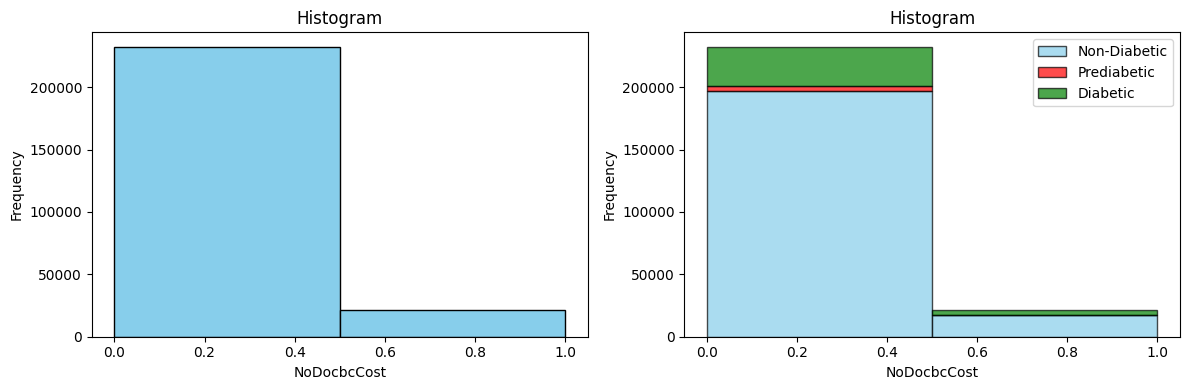

In [49]:
view_binary(df,'NoDocbcCost')

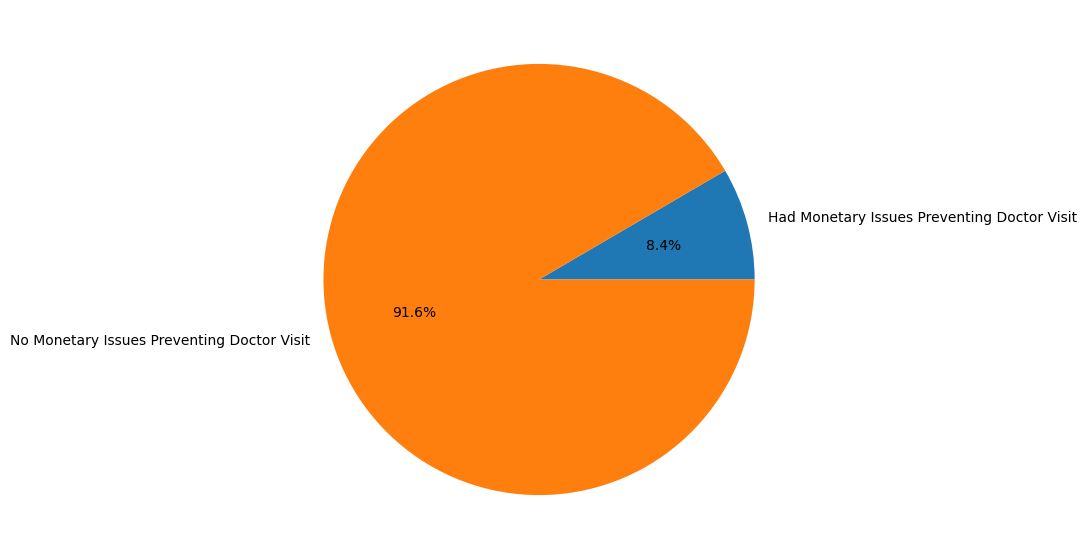

In [50]:
labels = ['Had Monetary Issues Preventing Doctor Visit', 'No Monetary Issues Preventing Doctor Visit']
data = [len(df[df['NoDocbcCost']==1]),len(df[df['NoDocbcCost']==0])]

fig = plt.figure(figsize=(10, 7))
plt.pie(data, labels=labels,autopct='%1.1f%%')

# show plot
plt.show()

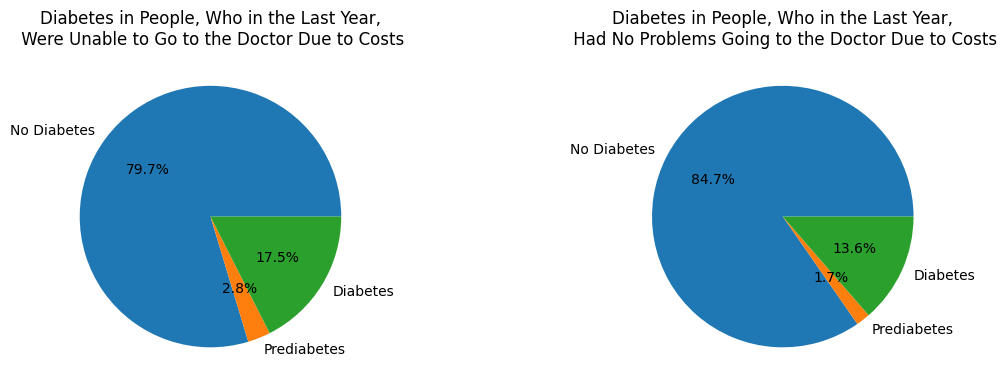

In [51]:
labels = ['No Diabetes','Prediabetes','Diabetes']
data_1 = [len(df[(df['NoDocbcCost']==1) & (df['Diabetes_012'] == 0)]),len(df[(df['NoDocbcCost']==1) & (df['Diabetes_012'] == 1)]), len(df[(df['NoDocbcCost']==1) & (df['Diabetes_012'] == 2)])]
data_2 = [len(df[(df['NoDocbcCost']==0) & (df['Diabetes_012'] == 0)]),len(df[(df['NoDocbcCost']==0) & (df['Diabetes_012'] == 1)]), len(df[(df['NoDocbcCost']==0) & (df['Diabetes_012'] == 2)])]


fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    

axes[0].pie(data_1, labels=labels,autopct='%1.1f%%')
axes[0].set_title('Diabetes in People, Who in the Last Year,\n Were Unable to Go to the Doctor Due to Costs')


axes[1].pie(data_2, labels=labels,autopct='%1.1f%%')
axes[1].set_title('Diabetes in People, Who in the Last Year,\n Had No Problems Going to the Doctor Due to Costs')

plt.tight_layout()
plt.show()

In [52]:
print (df[df.NoDocbcCost == 1].shape[0])
print (df[df.NoDocbcCost == 0].shape[0])
print ("Difference between the two values is {}".format(abs(df[df.NoDocbcCost == 1].shape[0] - df[df.NoDocbcCost == 0].shape[0])))

21354
232326
Difference between the two values is 210972


### DiffWalk
#### Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes

People with difficulty walking were significantly more likely to have diabetes and prediabetes

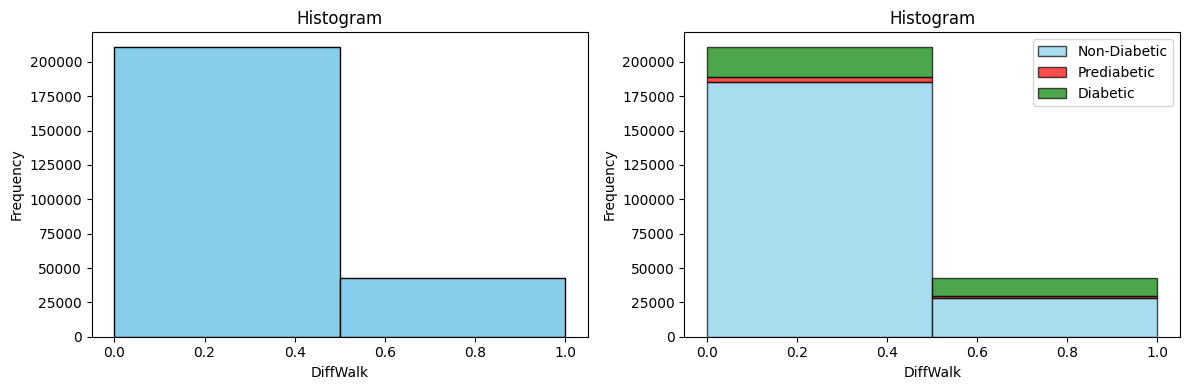

In [53]:
view_binary(df,'DiffWalk')

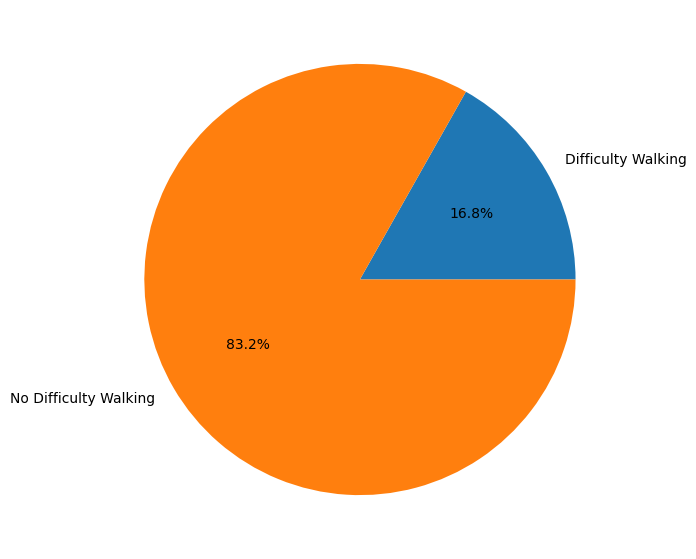

In [54]:
labels = ['Difficulty Walking', 'No Difficulty Walking']
data = [len(df[df['DiffWalk']==1]),len(df[df['DiffWalk']==0])]

fig = plt.figure(figsize=(10, 7))
plt.pie(data, labels=labels,autopct='%1.1f%%')

# show plot
plt.show()

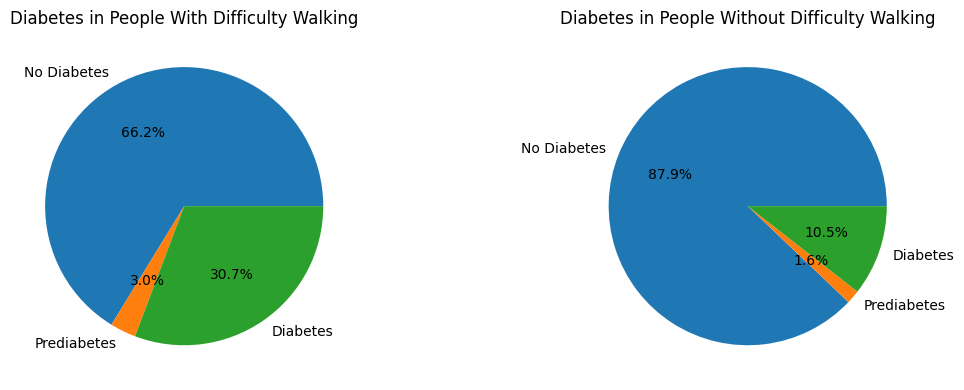

In [55]:
labels = ['No Diabetes','Prediabetes','Diabetes']
data_1 = [len(df[(df['DiffWalk']==1) & (df['Diabetes_012'] == 0)]),len(df[(df['DiffWalk']==1) & (df['Diabetes_012'] == 1)]), len(df[(df['DiffWalk']==1) & (df['Diabetes_012'] == 2)])]
data_2 = [len(df[(df['DiffWalk']==0) & (df['Diabetes_012'] == 0)]),len(df[(df['DiffWalk']==0) & (df['Diabetes_012'] == 1)]), len(df[(df['DiffWalk']==0) & (df['Diabetes_012'] == 2)])]


fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    

axes[0].pie(data_1, labels=labels,autopct='%1.1f%%')
axes[0].set_title('Diabetes in People With Difficulty Walking')


axes[1].pie(data_2, labels=labels,autopct='%1.1f%%')
axes[1].set_title('Diabetes in People Without Difficulty Walking')

plt.tight_layout()
plt.show()

In [56]:
print (df[df.DiffWalk == 1].shape[0])
print (df[df.DiffWalk == 0].shape[0])
print ("Difference between the two values is {}".format(abs(df[df.DiffWalk == 1].shape[0] - df[df.DiffWalk == 0].shape[0])))

42675
211005
Difference between the two values is 168330


### Sex

Men were slightly more likely to have diabetes than women, prediabetes is the same

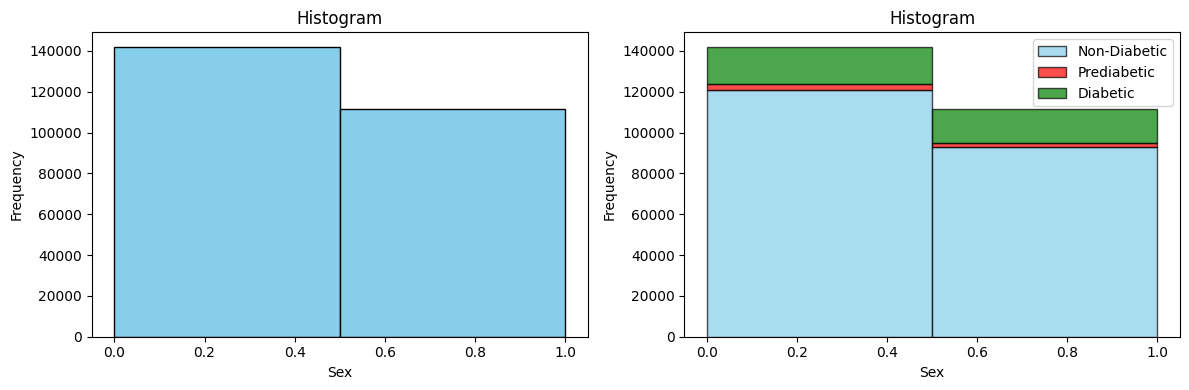

In [57]:
view_binary(df,'Sex')

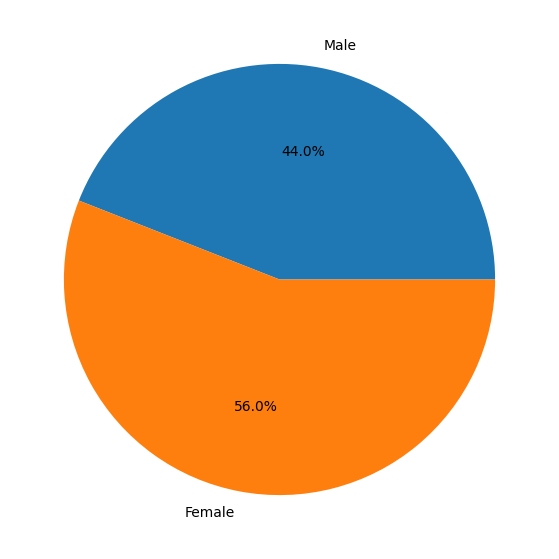

In [58]:
labels = ['Male', 'Female']
data = [len(df[df['Sex']==1]),len(df[df['Sex']==0])]

fig = plt.figure(figsize=(10, 7))
plt.pie(data, labels=labels,autopct='%1.1f%%')

# show plot
plt.show()

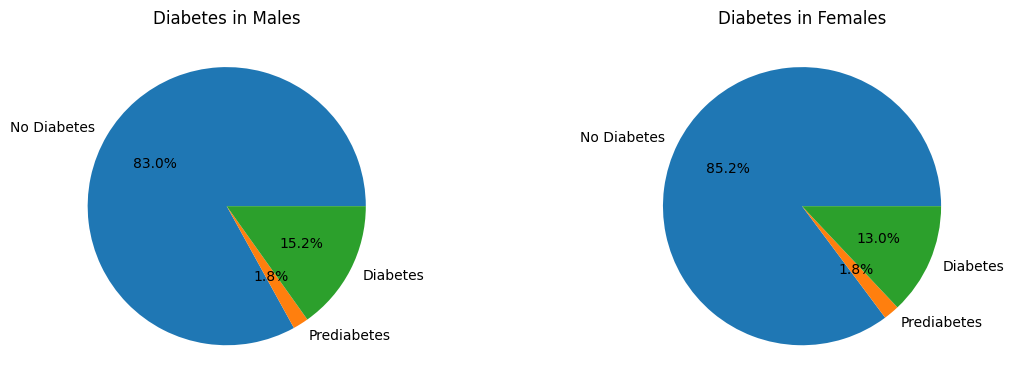

In [59]:
labels = ['No Diabetes','Prediabetes','Diabetes']
data_1 = [len(df[(df['Sex']==1) & (df['Diabetes_012'] == 0)]),len(df[(df['Sex']==1) & (df['Diabetes_012'] == 1)]), len(df[(df['Sex']==1) & (df['Diabetes_012'] == 2)])]
data_2 = [len(df[(df['Sex']==0) & (df['Diabetes_012'] == 0)]),len(df[(df['Sex']==0) & (df['Diabetes_012'] == 1)]), len(df[(df['Sex']==0) & (df['Diabetes_012'] == 2)])]


fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    

axes[0].pie(data_1, labels=labels,autopct='%1.1f%%')
axes[0].set_title('Diabetes in Males')


axes[1].pie(data_2, labels=labels,autopct='%1.1f%%')
axes[1].set_title('Diabetes in Females')

plt.tight_layout()
plt.show()

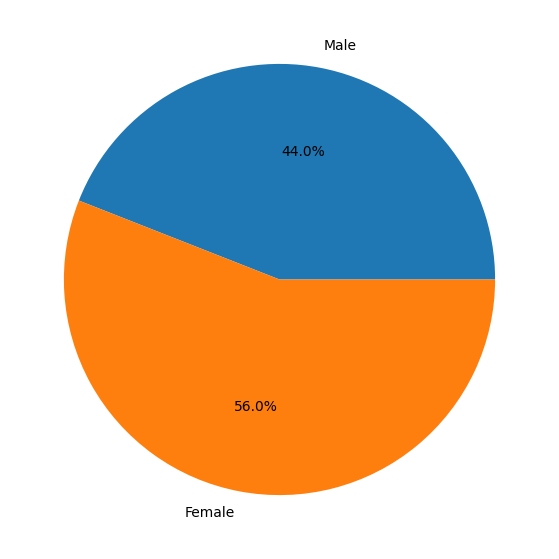

In [60]:
labels = ['Male', 'Female']
data = [len(df[df['Sex']==1]),len(df[df['Sex']==0])]

fig = plt.figure(figsize=(10, 7))
plt.pie(data, labels=labels,autopct='%1.1f%%')

# show plot
plt.show()

In [61]:
print (df[df.Sex == 1].shape[0])
print (df[df.Sex == 0].shape[0])
print ("Difference between the two values is {}".format(abs(df[df.Sex == 1].shape[0] - df[df.Sex == 0].shape[0])))

111706
141974
Difference between the two values is 30268


## Continuous

### BMI

Something resembling a standard distribution can be seen, but too many values are away from the mean and median

Prediabetics and diabetics tend to have a higher BMI on average than non-diabetics

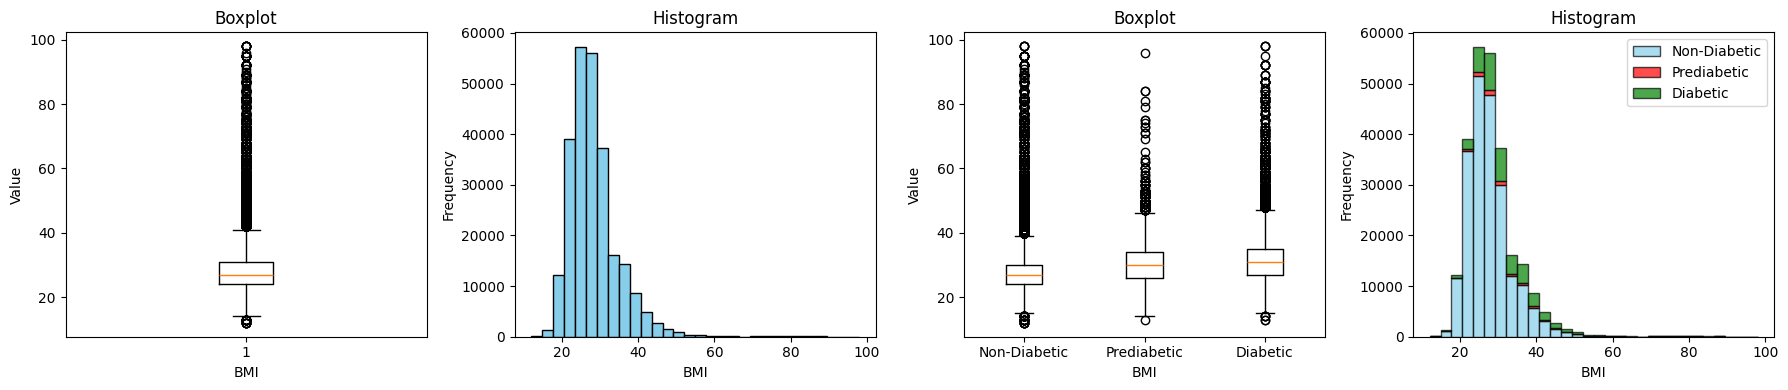

In [62]:
view_continuous(df,"BMI")

In [63]:
col_summary(df,"BMI")

Mean: 28.382363607694735
Standard Deviation: 6.608694201406008
Median: 27.0
Min: 12.0
Max: 98.0


## Ordinally Encoded

### General Health
#### Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor

The worse the health of an individual, the more likely they are to be diabetic or prediabetic

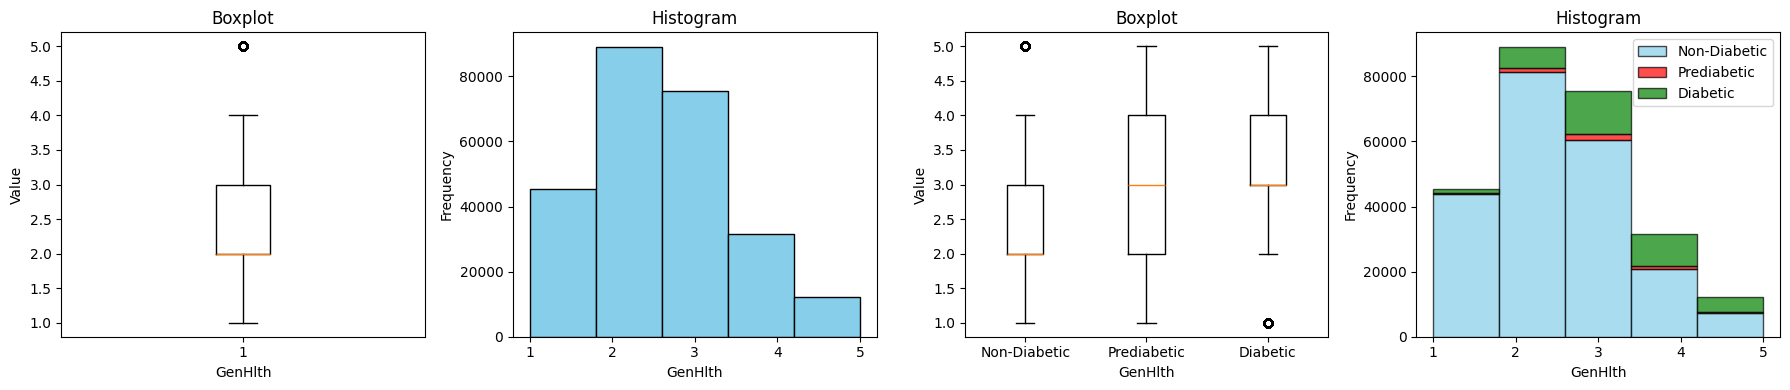

In [64]:
view_continuous(df,'GenHlth',5)

In [65]:
col_summary(df,"GenHlth")

Mean: 2.5113923052664773
Standard Deviation: 1.0684773622803934
Median: 2.0
Min: 1.0
Max: 5.0


### Let's one hot encode the column (We do this for every column moving forward)

In [66]:
df_modded = pd.get_dummies(df_modded,columns=['GenHlth'],dtype=int)

In [67]:
df_modded = df_modded.rename(columns={'GenHlth_1.0': 'Excellent General Health', 'GenHlth_2.0': 'Very Good General Health', 'GenHlth_3.0': 'Good General Health', 'GenHlth_4.0': 'Fair General Health', 'GenHlth_5.0': 'Poor General Health'})

In [68]:
df_modded

Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...              ...     ...       ...        ...   ...     ...     ...   
253675           0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676           2.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677           0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678           0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679           2.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  DiffWalk  Sex   Age  \
0                        0.0           0.0     0.0  ...       1.0  0.0   9.0   
1                        0.0           1.0     0.0  ...       0.0  0.0   7.0   
2                        0.0           0.0     1.0  ...       1.0  0.0   9.0   
3                        0.0           1.0     1.0  ...       0.0  0.0  11.0   
4                        0.0           1.0     1.0  ...       0.0  0.0  11.0   
...                      ...           ...     ...  ...       ...  ...   ...   
253675                   0.0           0.0     1.0  ...       0.0  1.0   5.0   
253676                   0.0           0.0     0.0  ...       1.0  0.0  11.0   
253677                   0.0           1.0     1.0  ...       0.0  0.0   2.0   
253678                   0.0           0.0     1.0  ...       0.0  1.0   7.0   
253679                   1.0           1.0     1.0  ...       0.0  0.0   9.0   

        Education  Income  Excellent General Health  Very Good General Health  \
0             4.0     3.0                         0                         0   
1             6.0     1.0                         0                         0   
2             4.0     8.0                         0                         0   
3             3.0     6.0                         0                         1   
4             5.0     4.0                         0                         1   
...           ...     ...                       ...                       ...   
253675        6.0     7.0                         0                         0   
253676        2.0     4.0                         0                         0   
253677        5.0     2.0                         1                         0   
253678        5.0     1.0                         0                         0   
253679        6.0     2.0                         0                         1   

        Good General Health  Fair General Health  Poor General Health  
0                         0                    0                    1  
1                         1                    0                    0  
2                         0                    0                    1  
3                         0                    0                    0  
4                         0                    0                    0  
...                     ...                  ...                  ...  
253675                    1                    0                    0  
253676                    0                    1                    0  
253677                    0                    0                    0  
253678                    1                    0                    0  
253679                    0                    0                    0  

[253680 rows x 26 columns]

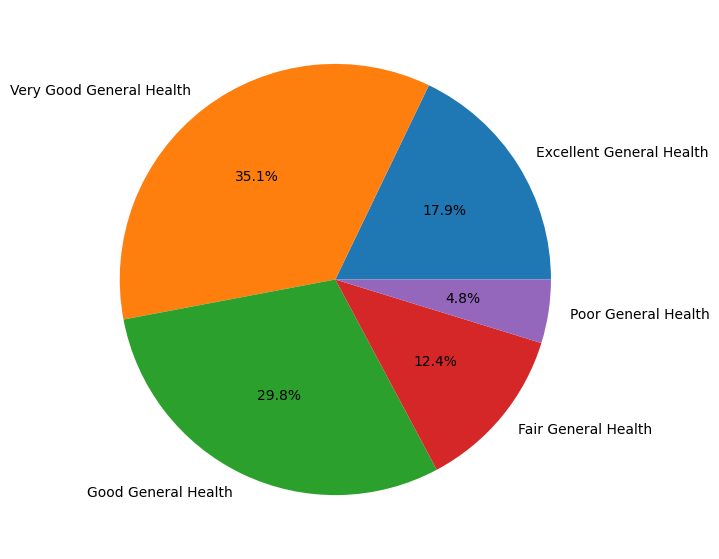

In [69]:
labels = ['Excellent General Health', 'Very Good General Health', 'Good General Health','Fair General Health', 'Poor General Health']
data = [len(df_modded[df_modded['Excellent General Health']==1]),len(df_modded[df_modded['Very Good General Health']==1]),len(df_modded[df_modded['Good General Health']==1]),len(df_modded[df_modded['Fair General Health']==1]),len(df_modded[df_modded['Poor General Health']==1])]

fig = plt.figure(figsize=(10, 7))
plt.pie(data, labels=labels,autopct='%1.1f%%')

# show plot
plt.show()

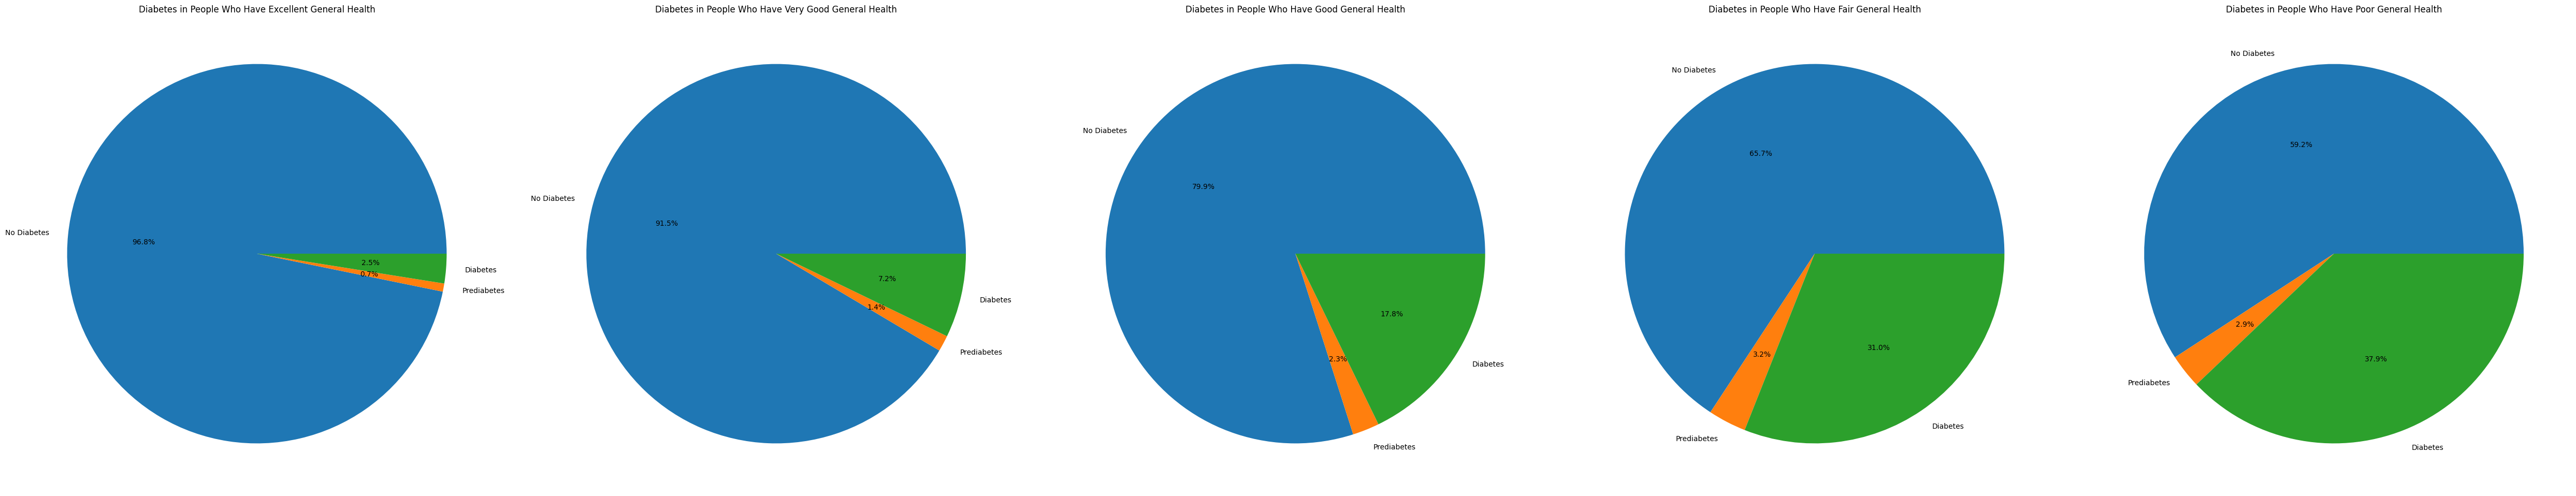

In [70]:
labels = ['No Diabetes','Prediabetes','Diabetes']

data_1 = [len(df_modded[(df_modded['Excellent General Health']==1) & (df_modded['Diabetes_012'] == 0)]),len(df_modded[(df_modded['Excellent General Health']==1) & (df_modded['Diabetes_012'] == 1)]), len(df_modded[(df_modded['Excellent General Health']==1) & (df_modded['Diabetes_012'] == 2)])]

data_2 = [len(df_modded[(df_modded['Very Good General Health']==1) & (df_modded['Diabetes_012'] == 0)]),len(df_modded[(df_modded['Very Good General Health']==1) & (df_modded['Diabetes_012'] == 1)]), len(df_modded[(df_modded['Very Good General Health']==1) & (df_modded['Diabetes_012'] == 2)])]

data_3 = [len(df_modded[(df_modded['Good General Health']==1) & (df_modded['Diabetes_012'] == 0)]),len(df_modded[(df_modded['Good General Health']==1) & (df_modded['Diabetes_012'] == 1)]), len(df_modded[(df_modded['Good General Health']==1) & (df_modded['Diabetes_012'] == 2)])]

data_4 = [len(df_modded[(df_modded['Fair General Health']==1) & (df_modded['Diabetes_012'] == 0)]),len(df_modded[(df_modded['Fair General Health']==1) & (df_modded['Diabetes_012'] == 1)]), len(df_modded[(df_modded['Fair General Health']==1) & (df_modded['Diabetes_012'] == 2)])]

data_5 = [len(df_modded[(df_modded['Poor General Health']==1) & (df_modded['Diabetes_012'] == 0)]),len(df_modded[(df_modded['Poor General Health']==1) & (df_modded['Diabetes_012'] == 1)]), len(df_modded[(df_modded['Poor General Health']==1) & (df_modded['Diabetes_012'] == 2)])]


fig, axes = plt.subplots(1, 5, figsize=(50, 50))
    

axes[0].pie(data_1, labels=labels,autopct='%1.1f%%')
axes[0].set_title('Diabetes in People Who Have Excellent General Health')

axes[1].pie(data_2, labels=labels,autopct='%1.1f%%')
axes[1].set_title('Diabetes in People Who Have Very Good General Health')

axes[2].pie(data_3, labels=labels,autopct='%1.1f%%')
axes[2].set_title('Diabetes in People Who Have Good General Health')

axes[3].pie(data_4, labels=labels,autopct='%1.1f%%')
axes[3].set_title('Diabetes in People Who Have Fair General Health')

axes[4].pie(data_5, labels=labels,autopct='%1.1f%%')
axes[4].set_title('Diabetes in People Who Have Poor General Health')

plt.tight_layout()
plt.show()

### Mental Health
#### Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good?

Poor mental helth slightly correlated with higher likelihood of diabetes and prediabetes

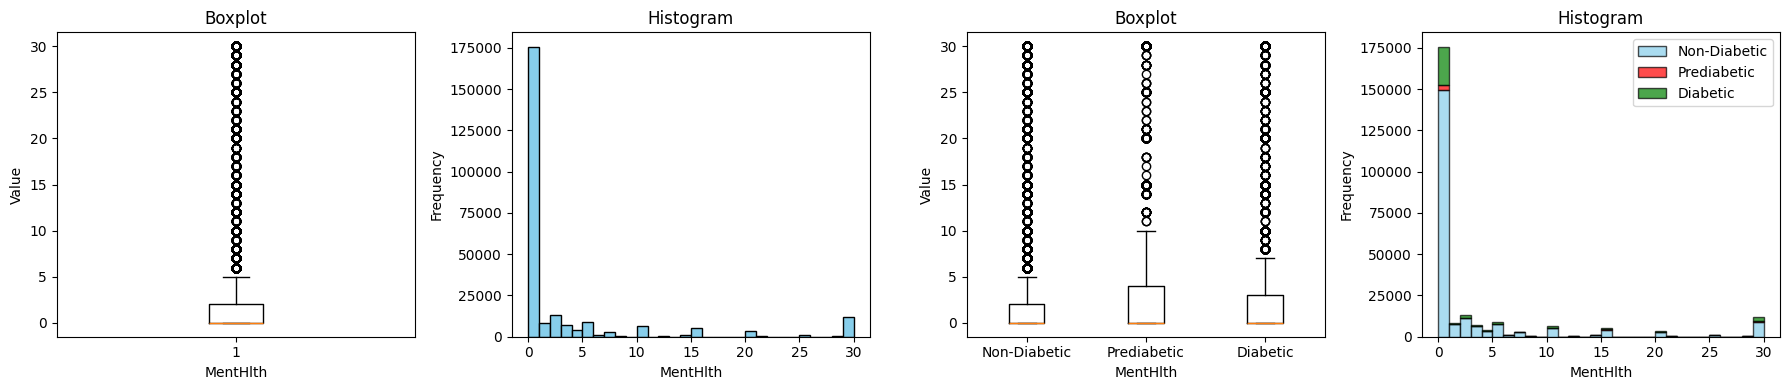

In [71]:
view_continuous(df,'MentHlth')

In [72]:
col_summary(df,"MentHlth")

Mean: 3.1847721538946705
Standard Deviation: 7.412846696196173
Median: 0.0
Min: 0.0
Max: 30.0


In [73]:
df_modded["Mentally Healthy"] = np.where(df["MentHlth"] == 0, 1, 0)

In [74]:
df_modded = df_modded.drop('MentHlth',axis=1)
df_modded

Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...              ...     ...       ...        ...   ...     ...     ...   
253675           0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676           2.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677           0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678           0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679           2.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  Sex   Age  Education  \
0                        0.0           0.0     0.0  ...  0.0   9.0        4.0   
1                        0.0           1.0     0.0  ...  0.0   7.0        6.0   
2                        0.0           0.0     1.0  ...  0.0   9.0        4.0   
3                        0.0           1.0     1.0  ...  0.0  11.0        3.0   
4                        0.0           1.0     1.0  ...  0.0  11.0        5.0   
...                      ...           ...     ...  ...  ...   ...        ...   
253675                   0.0           0.0     1.0  ...  1.0   5.0        6.0   
253676                   0.0           0.0     0.0  ...  0.0  11.0        2.0   
253677                   0.0           1.0     1.0  ...  0.0   2.0        5.0   
253678                   0.0           0.0     1.0  ...  1.0   7.0        5.0   
253679                   1.0           1.0     1.0  ...  0.0   9.0        6.0   

        Income  Excellent General Health  Very Good General Health  \
0          3.0                         0                         0   
1          1.0                         0                         0   
2          8.0                         0                         0   
3          6.0                         0                         1   
4          4.0                         0                         1   
...        ...                       ...                       ...   
253675     7.0                         0                         0   
253676     4.0                         0                         0   
253677     2.0                         1                         0   
253678     1.0                         0                         0   
253679     2.0                         0                         1   

        Good General Health  Fair General Health  Poor General Health  \
0                         0                    0                    1   
1                         1                    0                    0   
2                         0                    0                    1   
3                         0                    0                    0   
4                         0                    0                    0   
...                     ...                  ...                  ...   
253675                    1                    0                    0   
253676                    0                    1                    0   
253677                    0                    0                    0   
253678                    1                    0                    0   
253679                    0                    0                    0   

        Mentally Healthy  
0                      0  
1                      1  
2                      0  
3                      1  
4                      0  
...                  ...  
253675                 1  
253676                 1  
253677                 1  
253678                 1  
253679                 1  

[253680 rows x 26 columns]

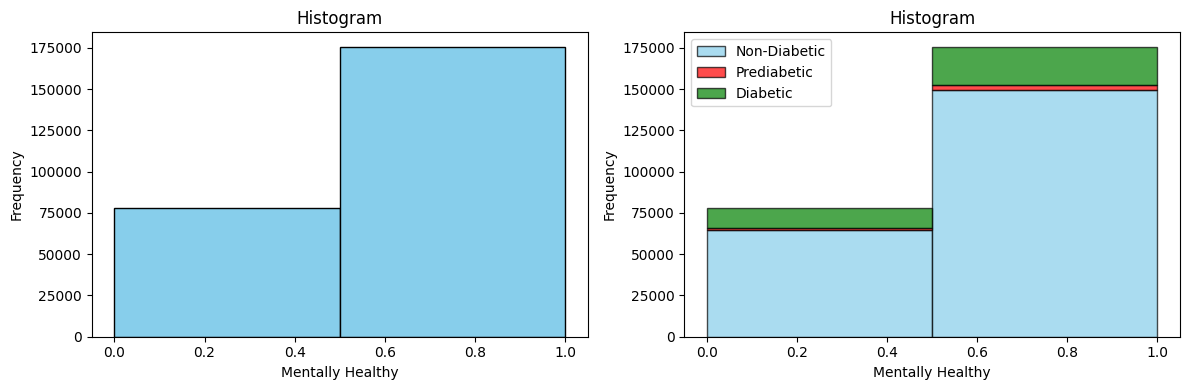

In [75]:
view_binary(df_modded,'Mentally Healthy')

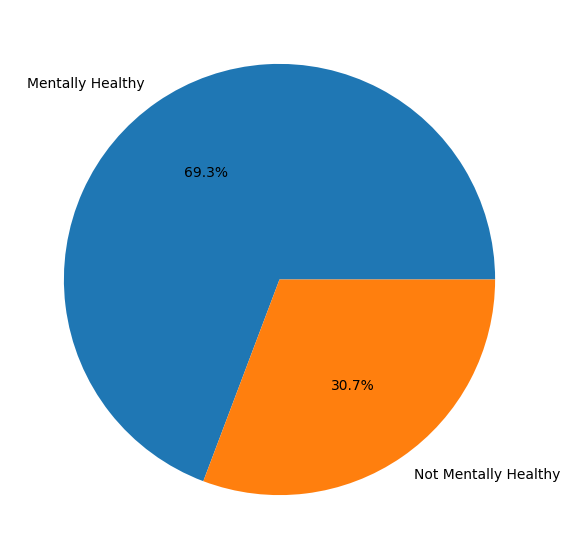

In [76]:
labels = ['Mentally Healthy', 'Not Mentally Healthy']
data = [len(df_modded[df_modded['Mentally Healthy']==1]),len(df_modded[df_modded['Mentally Healthy']==0])]

fig = plt.figure(figsize=(10, 7))
plt.pie(data, labels=labels,autopct='%1.1f%%')

# show plot
plt.show()

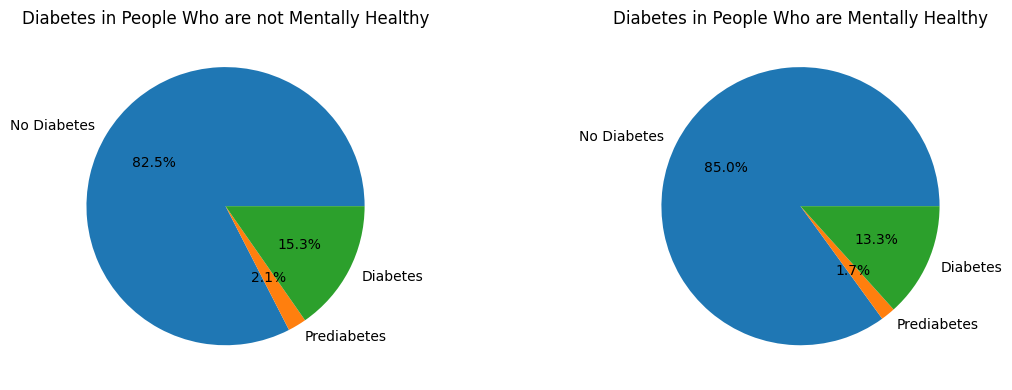

In [77]:
labels = ['No Diabetes','Prediabetes','Diabetes']
data_1 = [len(df_modded[(df_modded['Mentally Healthy']==0) & (df_modded['Diabetes_012'] == 0)]),len(df_modded[(df_modded['Mentally Healthy']==0) & (df_modded['Diabetes_012'] == 1)]), len(df_modded[(df_modded['Mentally Healthy']==0) & (df_modded['Diabetes_012'] == 2)])]
data_2 = [len(df_modded[(df_modded['Mentally Healthy']==1) & (df_modded['Diabetes_012'] == 0)]),len(df_modded[(df_modded['Mentally Healthy']==1) & (df_modded['Diabetes_012'] == 1)]), len(df_modded[(df_modded['Mentally Healthy']==1) & (df_modded['Diabetes_012'] == 2)])]


fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    

axes[0].pie(data_1, labels=labels,autopct='%1.1f%%')
axes[0].set_title('Diabetes in People Who are not Mentally Healthy')


axes[1].pie(data_2, labels=labels,autopct='%1.1f%%')
axes[1].set_title('Diabetes in People Who are Mentally Healthy')

plt.tight_layout()
plt.show()

### Physical Health
#### Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good?

People who reported more days of feeling physically unwell were more likely to report diabetes or prediabetes

Due to the lopsidedness of the data, it seems more fitting to split this feature into one binary feature indicating whether or not a person had any physical health complications over the last 30 days

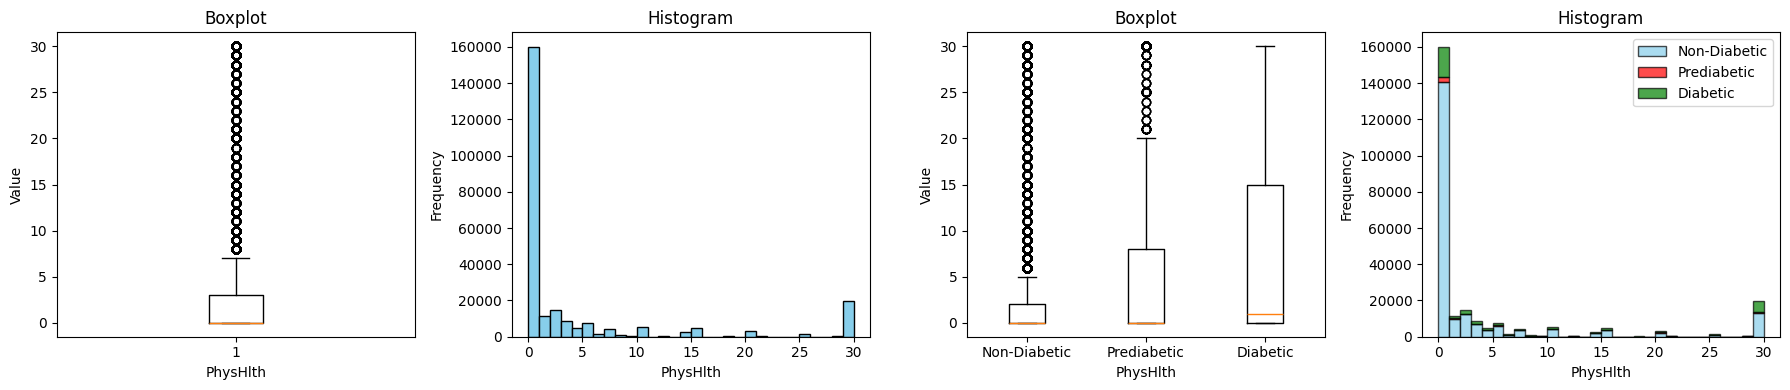

In [78]:
view_continuous(df,'PhysHlth')

In [79]:
df[df.PhysHlth == 0].shape[0]

160052

In [80]:
col_summary(df,'PhysHlth')

Mean: 4.2420805739514345
Standard Deviation: 8.717951307175127
Median: 0.0
Min: 0.0
Max: 30.0


In [81]:
df_modded["Physically Healthy"] = np.where(df["PhysHlth"] == 0, 1, 0)

In [82]:
df_modded = df_modded.drop('PhysHlth',axis=1)

In [83]:
df_modded

Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...              ...     ...       ...        ...   ...     ...     ...   
253675           0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676           2.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677           0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678           0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679           2.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...   Age  Education  \
0                        0.0           0.0     0.0  ...   9.0        4.0   
1                        0.0           1.0     0.0  ...   7.0        6.0   
2                        0.0           0.0     1.0  ...   9.0        4.0   
3                        0.0           1.0     1.0  ...  11.0        3.0   
4                        0.0           1.0     1.0  ...  11.0        5.0   
...                      ...           ...     ...  ...   ...        ...   
253675                   0.0           0.0     1.0  ...   5.0        6.0   
253676                   0.0           0.0     0.0  ...  11.0        2.0   
253677                   0.0           1.0     1.0  ...   2.0        5.0   
253678                   0.0           0.0     1.0  ...   7.0        5.0   
253679                   1.0           1.0     1.0  ...   9.0        6.0   

        Income  Excellent General Health  Very Good General Health  \
0          3.0                         0                         0   
1          1.0                         0                         0   
2          8.0                         0                         0   
3          6.0                         0                         1   
4          4.0                         0                         1   
...        ...                       ...                       ...   
253675     7.0                         0                         0   
253676     4.0                         0                         0   
253677     2.0                         1                         0   
253678     1.0                         0                         0   
253679     2.0                         0                         1   

        Good General Health  Fair General Health  Poor General Health  \
0                         0                    0                    1   
1                         1                    0                    0   
2                         0                    0                    1   
3                         0                    0                    0   
4                         0                    0                    0   
...                     ...                  ...                  ...   
253675                    1                    0                    0   
253676                    0                    1                    0   
253677                    0                    0                    0   
253678                    1                    0                    0   
253679                    0                    0                    0   

        Mentally Healthy  Physically Healthy  
0                      0                   0  
1                      1                   1  
2                      0                   0  
3                      1                   1  
4                      0                   1  
...                  ...                 ...  
253675                 1                   0  
253676                 1                   1  
253677                 1                   1  
253678

Diabetics were notably more likely than non-diabetics and prediabetics to report any form of physical unwellness

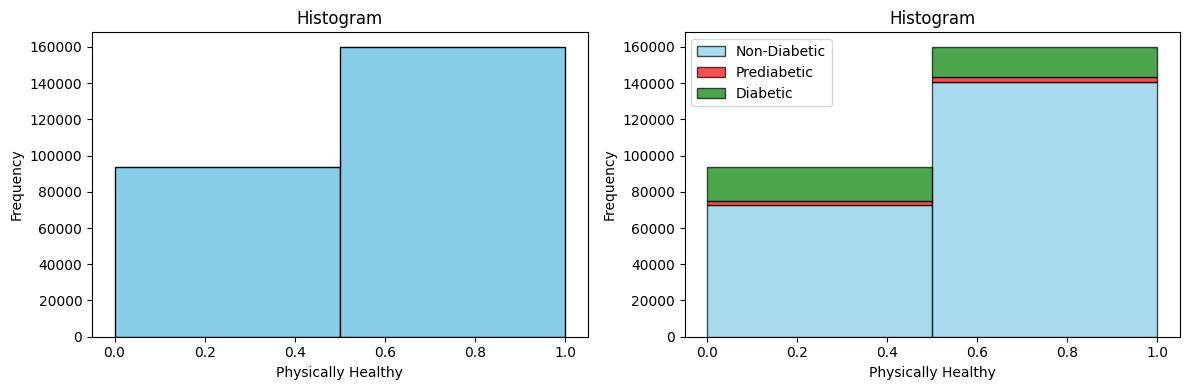

In [84]:
view_binary(df_modded,'Physically Healthy')

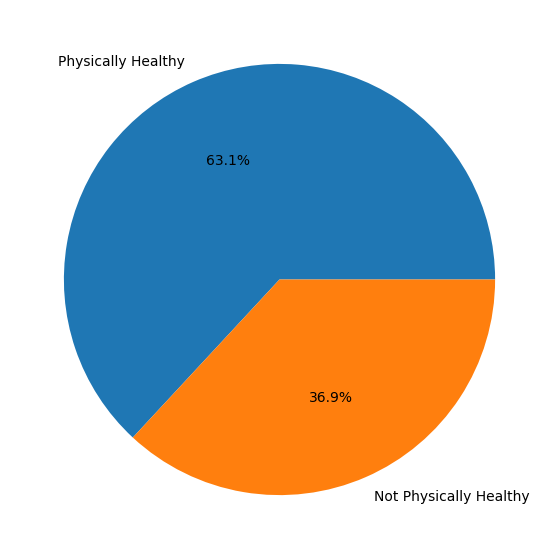

In [85]:
labels = ['Physically Healthy', 'Not Physically Healthy']
data = [len(df_modded[df_modded['Physically Healthy']==1]),len(df_modded[df_modded['Physically Healthy']==0])]

fig = plt.figure(figsize=(10, 7))
plt.pie(data, labels=labels,autopct='%1.1f%%')

# show plot
plt.show()

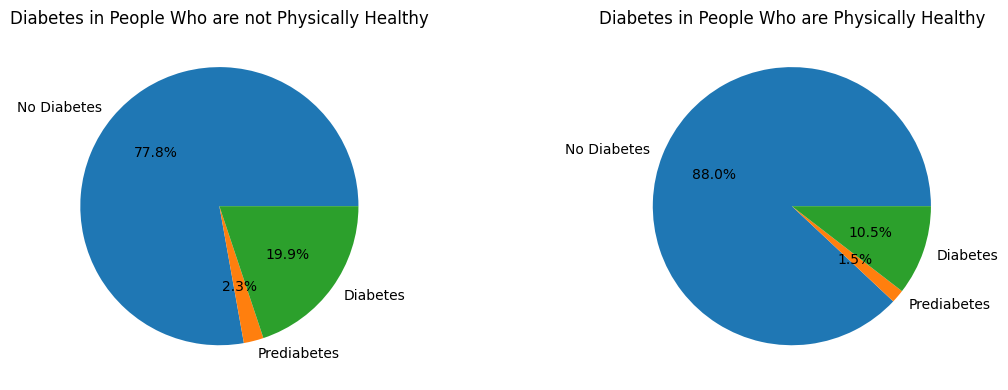

In [86]:
labels = ['No Diabetes','Prediabetes','Diabetes']
data_1 = [len(df_modded[(df_modded['Physically Healthy']==0) & (df_modded['Diabetes_012'] == 0)]),len(df_modded[(df_modded['Physically Healthy']==0) & (df_modded['Diabetes_012'] == 1)]), len(df_modded[(df_modded['Physically Healthy']==0) & (df_modded['Diabetes_012'] == 2)])]
data_2 = [len(df_modded[(df_modded['Physically Healthy']==1) & (df_modded['Diabetes_012'] == 0)]),len(df_modded[(df_modded['Physically Healthy']==1) & (df_modded['Diabetes_012'] == 1)]), len(df_modded[(df_modded['Physically Healthy']==1) & (df_modded['Diabetes_012'] == 2)])]


fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    

axes[0].pie(data_1, labels=labels,autopct='%1.1f%%')
axes[0].set_title('Diabetes in People Who are not Physically Healthy')


axes[1].pie(data_2, labels=labels,autopct='%1.1f%%')
axes[1].set_title('Diabetes in People Who are Physically Healthy')

plt.tight_layout()
plt.show()

### Age
#### Each 5 year age group gets a number where higher scores means older ages

Age increased likelihood of diabetes and prediabetes

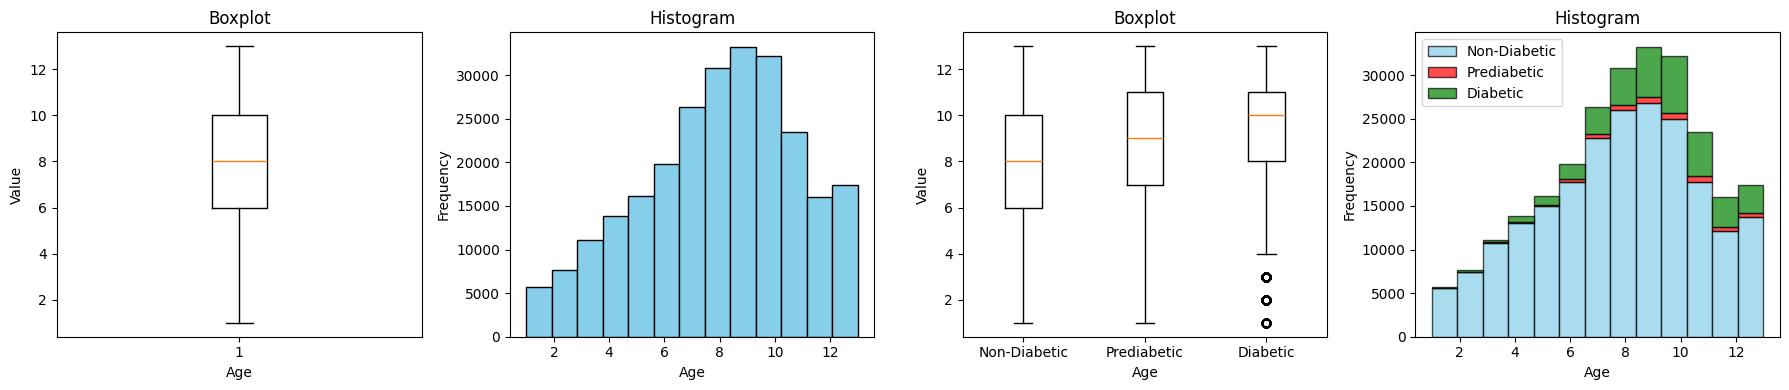

In [87]:
view_continuous(df,'Age',13)

In [88]:
col_summary(df,'Age')

Mean: 8.032119205298013
Standard Deviation: 3.054220434168484
Median: 8.0
Min: 1.0
Max: 13.0


In [89]:
df_modded = pd.get_dummies(df_modded,columns=['Age'],dtype=int)

In [90]:
df_modded = df_modded.rename(columns={'Age_1.0': 'Age 18 to 24', 'Age_2.0': 'Age 25 to 29', 'Age_3.0': 'Age 30 to 34', 'Age_4.0': 'Age 35 to 39', 'Age_5.0': 'Age 40 to 44'
                                      , 'Age_6.0': 'Age 45 to 49', 'Age_7.0': 'Age 50 to 54', 'Age_8.0': 'Age 55 to 59', 'Age_9.0': 'Age 60 to 64'
                                      , 'Age_10.0': 'Age 65 to 69', 'Age_11.0': 'Age 70 to 74', 'Age_12.0': 'Age 75 to 79', 'Age_13.0':'Age 80 or older'})

In [91]:
df_modded

Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...              ...     ...       ...        ...   ...     ...     ...   
253675           0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676           2.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677           0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678           0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679           2.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  Age 35 to 39  \
0                        0.0           0.0     0.0  ...             0   
1                        0.0           1.0     0.0  ...             0   
2                        0.0           0.0     1.0  ...             0   
3                        0.0           1.0     1.0  ...             0   
4                        0.0           1.0     1.0  ...             0   
...                      ...           ...     ...  ...           ...   
253675                   0.0           0.0     1.0  ...             0   
253676                   0.0           0.0     0.0  ...             0   
253677                   0.0           1.0     1.0  ...             0   
253678                   0.0           0.0     1.0  ...             0   
253679                   1.0           1.0     1.0  ...             0   

        Age 40 to 44  Age 45 to 49  Age 50 to 54  Age 55 to 59  Age 60 to 64  \
0                  0             0             0             0             1   
1                  0             0             1             0             0   
2                  0             0             0             0             1   
3                  0             0             0             0             0   
4                  0             0             0             0             0   
...              ...           ...           ...           ...           ...   
253675             1             0             0             0             0   
253676             0             0             0             0             0   
253677             0             0             0             0             0   
253678             0             0             1             0             0   
253679             0             0             0             0             1   

        Age 65 to 69  Age 70 to 74  Age 75 to 79  Age 80 or older  
0                  0             0             0                0  
1                  0             0             0                0  
2                  0             0             0                0  
3                  0             1             0                0  
4                  0             1             0                0  
...              ...           ...           ...              ...  
253675             0             0             0                0  
253676             0             1             0                0  
253677             0             0             0                0  
253678             0             0             0                0  
253679             0             0             0                0  

[253680 rows x 38 columns]

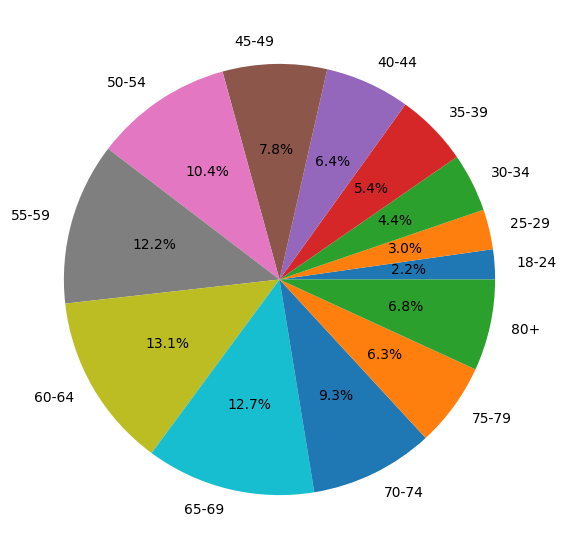

In [92]:
labels = ['18-24', '25-29', '30-34', '35-39', '40-44'
                                      , '45-49', '50-54', '55-59', '60-64'
                                      , '65-69', '70-74', '75-79', '80+']
data = [len(df_modded[df_modded['Age 18 to 24']==1]),len(df_modded[df_modded['Age 25 to 29']==1]),len(df_modded[df_modded['Age 30 to 34']==1])
        ,len(df_modded[df_modded['Age 35 to 39']==1]),len(df_modded[df_modded['Age 40 to 44']==1]),len(df_modded[df_modded['Age 45 to 49']==1])
        ,len(df_modded[df_modded['Age 50 to 54']==1]),len(df_modded[df_modded['Age 55 to 59']==1]),len(df_modded[df_modded['Age 60 to 64']==1])
        ,len(df_modded[df_modded['Age 65 to 69']==1]),len(df_modded[df_modded['Age 70 to 74']==1]),len(df_modded[df_modded['Age 75 to 79']==1])
        ,len(df_modded[df_modded['Age 80 or older']==1])]

fig = plt.figure(figsize=(10, 7))
plt.pie(data, labels=labels,autopct='%1.1f%%')

# show plot
plt.show()

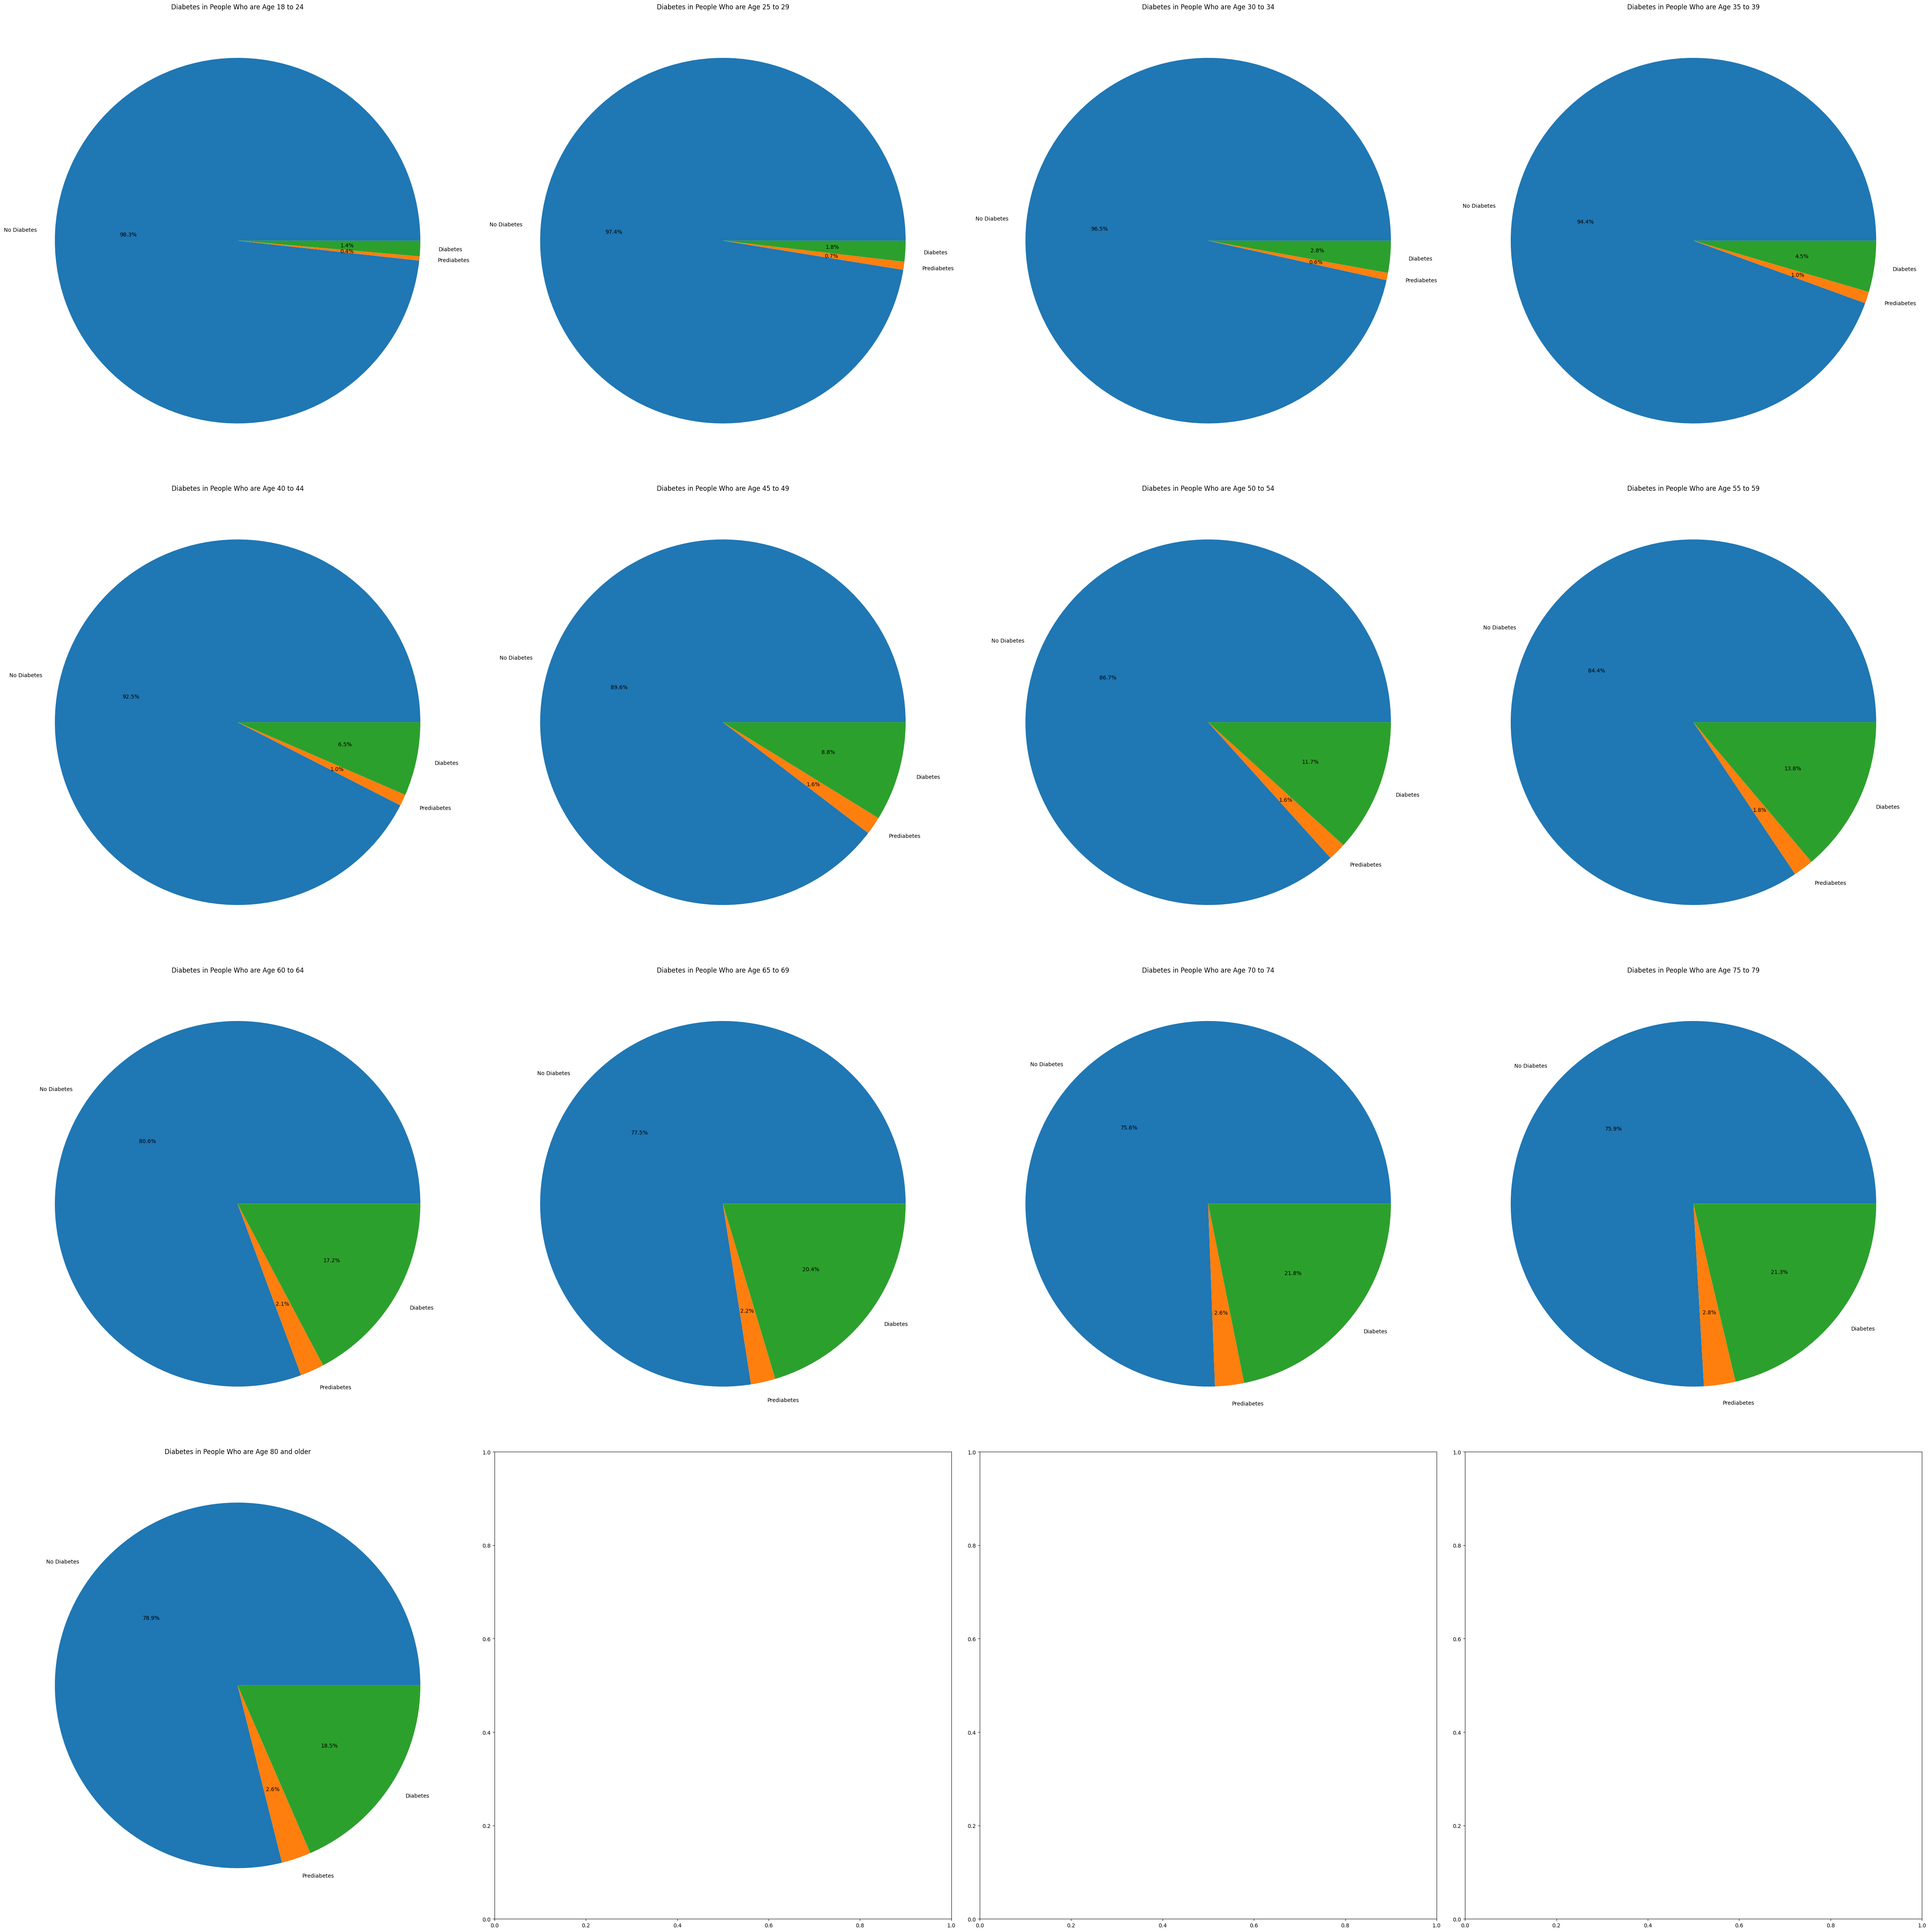

In [93]:
labels = ['No Diabetes','Prediabetes','Diabetes']

data_1 = [len(df_modded[(df_modded['Age 18 to 24']==1) & (df_modded['Diabetes_012'] == 0)]),len(df_modded[(df_modded['Age 18 to 24']==1) & (df_modded['Diabetes_012'] == 1)]), len(df_modded[(df_modded['Age 18 to 24']==1) & (df_modded['Diabetes_012'] == 2)])]

data_2 = [len(df_modded[(df_modded['Age 25 to 29']==1) & (df_modded['Diabetes_012'] == 0)]),len(df_modded[(df_modded['Age 25 to 29']==1) & (df_modded['Diabetes_012'] == 1)]), len(df_modded[(df_modded['Age 25 to 29']==1) & (df_modded['Diabetes_012'] == 2)])]

data_3 = [len(df_modded[(df_modded['Age 30 to 34']==1) & (df_modded['Diabetes_012'] == 0)]),len(df_modded[(df_modded['Age 30 to 34']==1) & (df_modded['Diabetes_012'] == 1)]), len(df_modded[(df_modded['Age 30 to 34']==1) & (df_modded['Diabetes_012'] == 2)])]

data_4 = [len(df_modded[(df_modded['Age 35 to 39']==1) & (df_modded['Diabetes_012'] == 0)]),len(df_modded[(df_modded['Age 35 to 39']==1) & (df_modded['Diabetes_012'] == 1)]), len(df_modded[(df_modded['Age 35 to 39']==1) & (df_modded['Diabetes_012'] == 2)])]

data_5 = [len(df_modded[(df_modded['Age 40 to 44']==1) & (df_modded['Diabetes_012'] == 0)]),len(df_modded[(df_modded['Age 40 to 44']==1) & (df_modded['Diabetes_012'] == 1)]), len(df_modded[(df_modded['Age 40 to 44']==1) & (df_modded['Diabetes_012'] == 2)])]

data_6 = [len(df_modded[(df_modded['Age 45 to 49']==1) & (df_modded['Diabetes_012'] == 0)]),len(df_modded[(df_modded['Age 45 to 49']==1) & (df_modded['Diabetes_012'] == 1)]), len(df_modded[(df_modded['Age 45 to 49']==1) & (df_modded['Diabetes_012'] == 2)])]

data_7 = [len(df_modded[(df_modded['Age 50 to 54']==1) & (df_modded['Diabetes_012'] == 0)]),len(df_modded[(df_modded['Age 50 to 54']==1) & (df_modded['Diabetes_012'] == 1)]), len(df_modded[(df_modded['Age 50 to 54']==1) & (df_modded['Diabetes_012'] == 2)])]

data_8 = [len(df_modded[(df_modded['Age 55 to 59']==1) & (df_modded['Diabetes_012'] == 0)]),len(df_modded[(df_modded['Age 55 to 59']==1) & (df_modded['Diabetes_012'] == 1)]), len(df_modded[(df_modded['Age 55 to 59']==1) & (df_modded['Diabetes_012'] == 2)])]

data_9 = [len(df_modded[(df_modded['Age 60 to 64']==1) & (df_modded['Diabetes_012'] == 0)]),len(df_modded[(df_modded['Age 60 to 64']==1) & (df_modded['Diabetes_012'] == 1)]), len(df_modded[(df_modded['Age 60 to 64']==1) & (df_modded['Diabetes_012'] == 2)])]

data_10 = [len(df_modded[(df_modded['Age 65 to 69']==1) & (df_modded['Diabetes_012'] == 0)]),len(df_modded[(df_modded['Age 65 to 69']==1) & (df_modded['Diabetes_012'] == 1)]), len(df_modded[(df_modded['Age 65 to 69']==1) & (df_modded['Diabetes_012'] == 2)])]

data_11 = [len(df_modded[(df_modded['Age 70 to 74']==1) & (df_modded['Diabetes_012'] == 0)]),len(df_modded[(df_modded['Age 70 to 74']==1) & (df_modded['Diabetes_012'] == 1)]), len(df_modded[(df_modded['Age 70 to 74']==1) & (df_modded['Diabetes_012'] == 2)])]

data_12 = [len(df_modded[(df_modded['Age 75 to 79']==1) & (df_modded['Diabetes_012'] == 0)]),len(df_modded[(df_modded['Age 75 to 79']==1) & (df_modded['Diabetes_012'] == 1)]), len(df_modded[(df_modded['Age 75 to 79']==1) & (df_modded['Diabetes_012'] == 2)])]


data_13 = [len(df_modded[(df_modded['Age 80 or older']==1) & (df_modded['Diabetes_012'] == 0)]),len(df_modded[(df_modded['Age 80 or older']==1) & (df_modded['Diabetes_012'] == 1)]), len(df_modded[(df_modded['Age 80 or older']==1) & (df_modded['Diabetes_012'] == 2)])]

fig, axes = plt.subplots(4, 4, figsize=(50, 50))
    

axes[0][0].pie(data_1, labels=labels,autopct='%1.1f%%')
axes[0][0].set_title('Diabetes in People Who are Age 18 to 24')

axes[0][1].pie(data_2, labels=labels,autopct='%1.1f%%')
axes[0][1].set_title('Diabetes in People Who are Age 25 to 29')

axes[0][2].pie(data_3, labels=labels,autopct='%1.1f%%')
axes[0][2].set_title('Diabetes in People Who are Age 30 to 34')

axes[0][3].pie(data_4, labels=labels,autopct='%1.1f%%')
axes[0][3].set_title('Diabetes in People Who are Age 35 to 39')

axes[1][0].pie(data_5, labels=labels,autopct='%1.1f%%')
axes[1][0].set_title('Diabetes in People Who are Age 40 to 44')

axes[1][1].pie(data_6, labels=labels,autopct='%1.1f%%')
axes[1][1].set_title('Diabetes in People Who are Age 45 to 49')

axes[1][2].pie(data_7, labels=labels,autopct='%1.1f%%')
axes[1][2].set_title('Diabetes in People Who are Age 50 to 54')

axes[1][3].pie(data_8, labels=labels,autopct='%1.1f%%')
axes[1][3].set_title('Diabetes in People Who are Age 55 to 59')

axes[2][0].pie(data_9, labels=labels,autopct='%1.1f%%')
axes[2][0].set_title('Diabetes in People Who are Age 60 to 64')

axes[2][1].pie(data_10, labels=labels,autopct='%1.1f%%')
axes[2][1].set_title('Diabetes in People Who are Age 65 to 69')

axes[2][2].pie(data_11, labels=labels,autopct='%1.1f%%')
axes[2][2].set_title('Diabetes in People Who are Age 70 to 74')

axes[2][3].pie(data_12, labels=labels,autopct='%1.1f%%')
axes[2][3].set_title('Diabetes in People Who are Age 75 to 79')

axes[3][0].pie(data_13, labels=labels,autopct='%1.1f%%')
axes[3][0].set_title('Diabetes in People Who are Age 80 and older')

plt.tight_layout()
plt.show()

### Education
#### 1 means never attended school or kindergarten and 6 means being in college for 4 years or more

High school graduates are the least likely to develop diabetes and prediabetes while people who didn’t finish past kindergarten were the least likely to develop prediabetes. Elementary schoolers were the most likely to develop both diabetes and prediabetes.

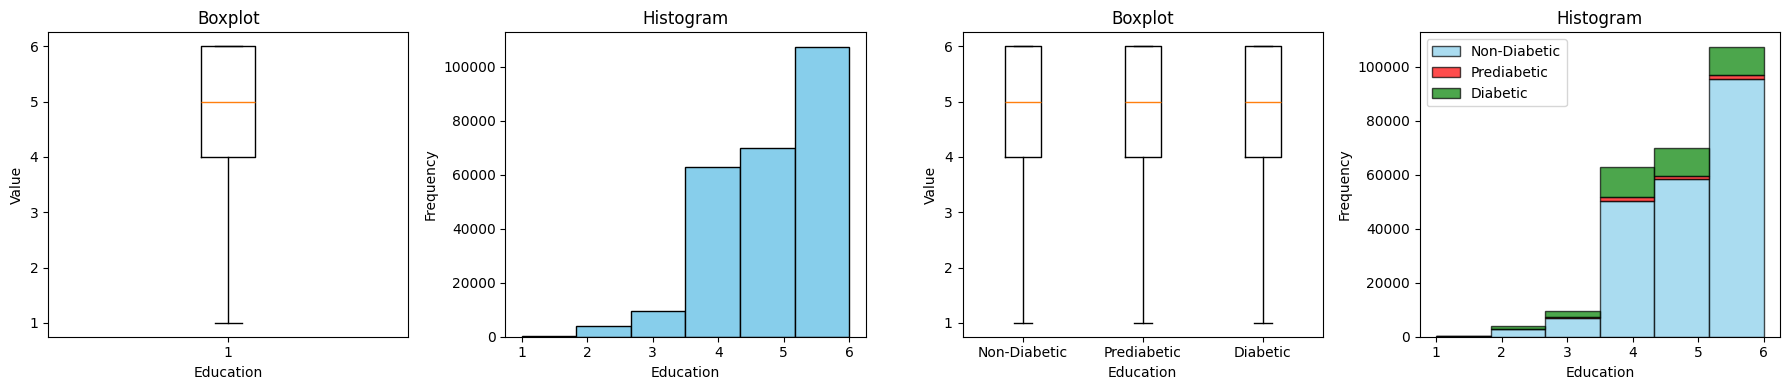

In [94]:
view_continuous(df,'Education',6)

In [95]:
col_summary(df,'Education')

Mean: 5.050433617155472
Standard Deviation: 0.9857741757276509
Median: 5.0
Min: 1.0
Max: 6.0


In [96]:
df_modded["Never Attended or Only Kindergarten"] = np.where(df["Education"] == 1, 1, 0)
df_modded["Grades 1 through 8 (Elementary)"] = np.where(df["Education"] == 2, 1, 0)
df_modded["Grades 9 through 11 (Some high school)"] = np.where(df["Education"] == 3, 1, 0)
df_modded["Grade 12 or GED (High school graduate)"] = np.where(df["Education"] == 4, 1, 0)
df_modded["College 1 year to 3 years (Some college or technical school)"] = np.where(df["Education"] == 5, 1, 0)
df_modded["College 4 years or more (College graduate)"] = np.where(df["Education"] == 6, 1, 0)

In [97]:
df_modded = df_modded.drop('Education',axis=1)

In [98]:
df_modded

Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...              ...     ...       ...        ...   ...     ...     ...   
253675           0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676           2.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677           0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678           0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679           2.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  Age 65 to 69  \
0                        0.0           0.0     0.0  ...             0   
1                        0.0           1.0     0.0  ...             0   
2                        0.0           0.0     1.0  ...             0   
3                        0.0           1.0     1.0  ...             0   
4                        0.0           1.0     1.0  ...             0   
...                      ...           ...     ...  ...           ...   
253675                   0.0           0.0     1.0  ...             0   
253676                   0.0           0.0     0.0  ...             0   
253677                   0.0           1.0     1.0  ...             0   
253678                   0.0           0.0     1.0  ...             0   
253679                   1.0           1.0     1.0  ...             0   

        Age 70 to 74  Age 75 to 79  Age 80 or older  \
0                  0             0                0   
1                  0             0                0   
2                  0             0                0   
3                  1             0                0   
4                  1             0                0   
...              ...           ...              ...   
253675             0             0                0   
253676             1             0                0   
253677             0             0                0   
253678             0             0                0   
253679             0             0                0   

        Never Attended or Only Kindergarten  Grades 1 through 8 (Elementary)  \
0                                         0                                0   
1                                         0                                0   
2                                         0                                0   
3                                         0                                0   
4                                         0                                0   
...                                     ...                              ...   
253675                                    0                                0   
253676                                    0                                1   
253677                                    0                                0   
253678                                    0                                0   
253679                                    0                                0   

        Grades 9 through 11 (Some high school)  \
0                                            0   
1                                            0   
2                                            0   
3                                            1   
4                                            0   
...                                        ...   
253675                                       0   
253676                                       0   
253677                                       0   
253678                                       0   
253679                                       0   

       

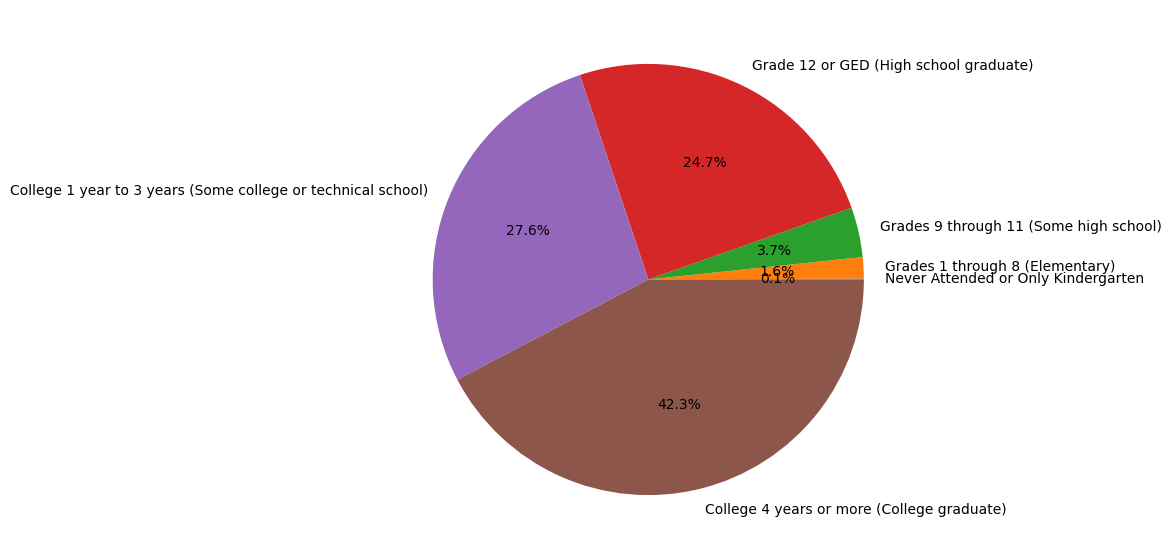

In [99]:
labels = ['Never Attended or Only Kindergarten', 'Grades 1 through 8 (Elementary)', 'Grades 9 through 11 (Some high school)', 'Grade 12 or GED (High school graduate)', 'College 1 year to 3 years (Some college or technical school)',
          'College 4 years or more (College graduate)']
data = [len(df_modded[df_modded['Never Attended or Only Kindergarten']==1]),len(df_modded[df_modded['Grades 1 through 8 (Elementary)']==1]),len(df_modded[df_modded['Grades 9 through 11 (Some high school)']==1])
        ,len(df_modded[df_modded['Grade 12 or GED (High school graduate)']==1]), len(df_modded[df_modded['College 1 year to 3 years (Some college or technical school)']==1]), len(df_modded[df_modded['College 4 years or more (College graduate)']==1])]

fig = plt.figure(figsize=(10, 7))
plt.pie(data, labels=labels,autopct='%1.1f%%')

# show plot
plt.show()

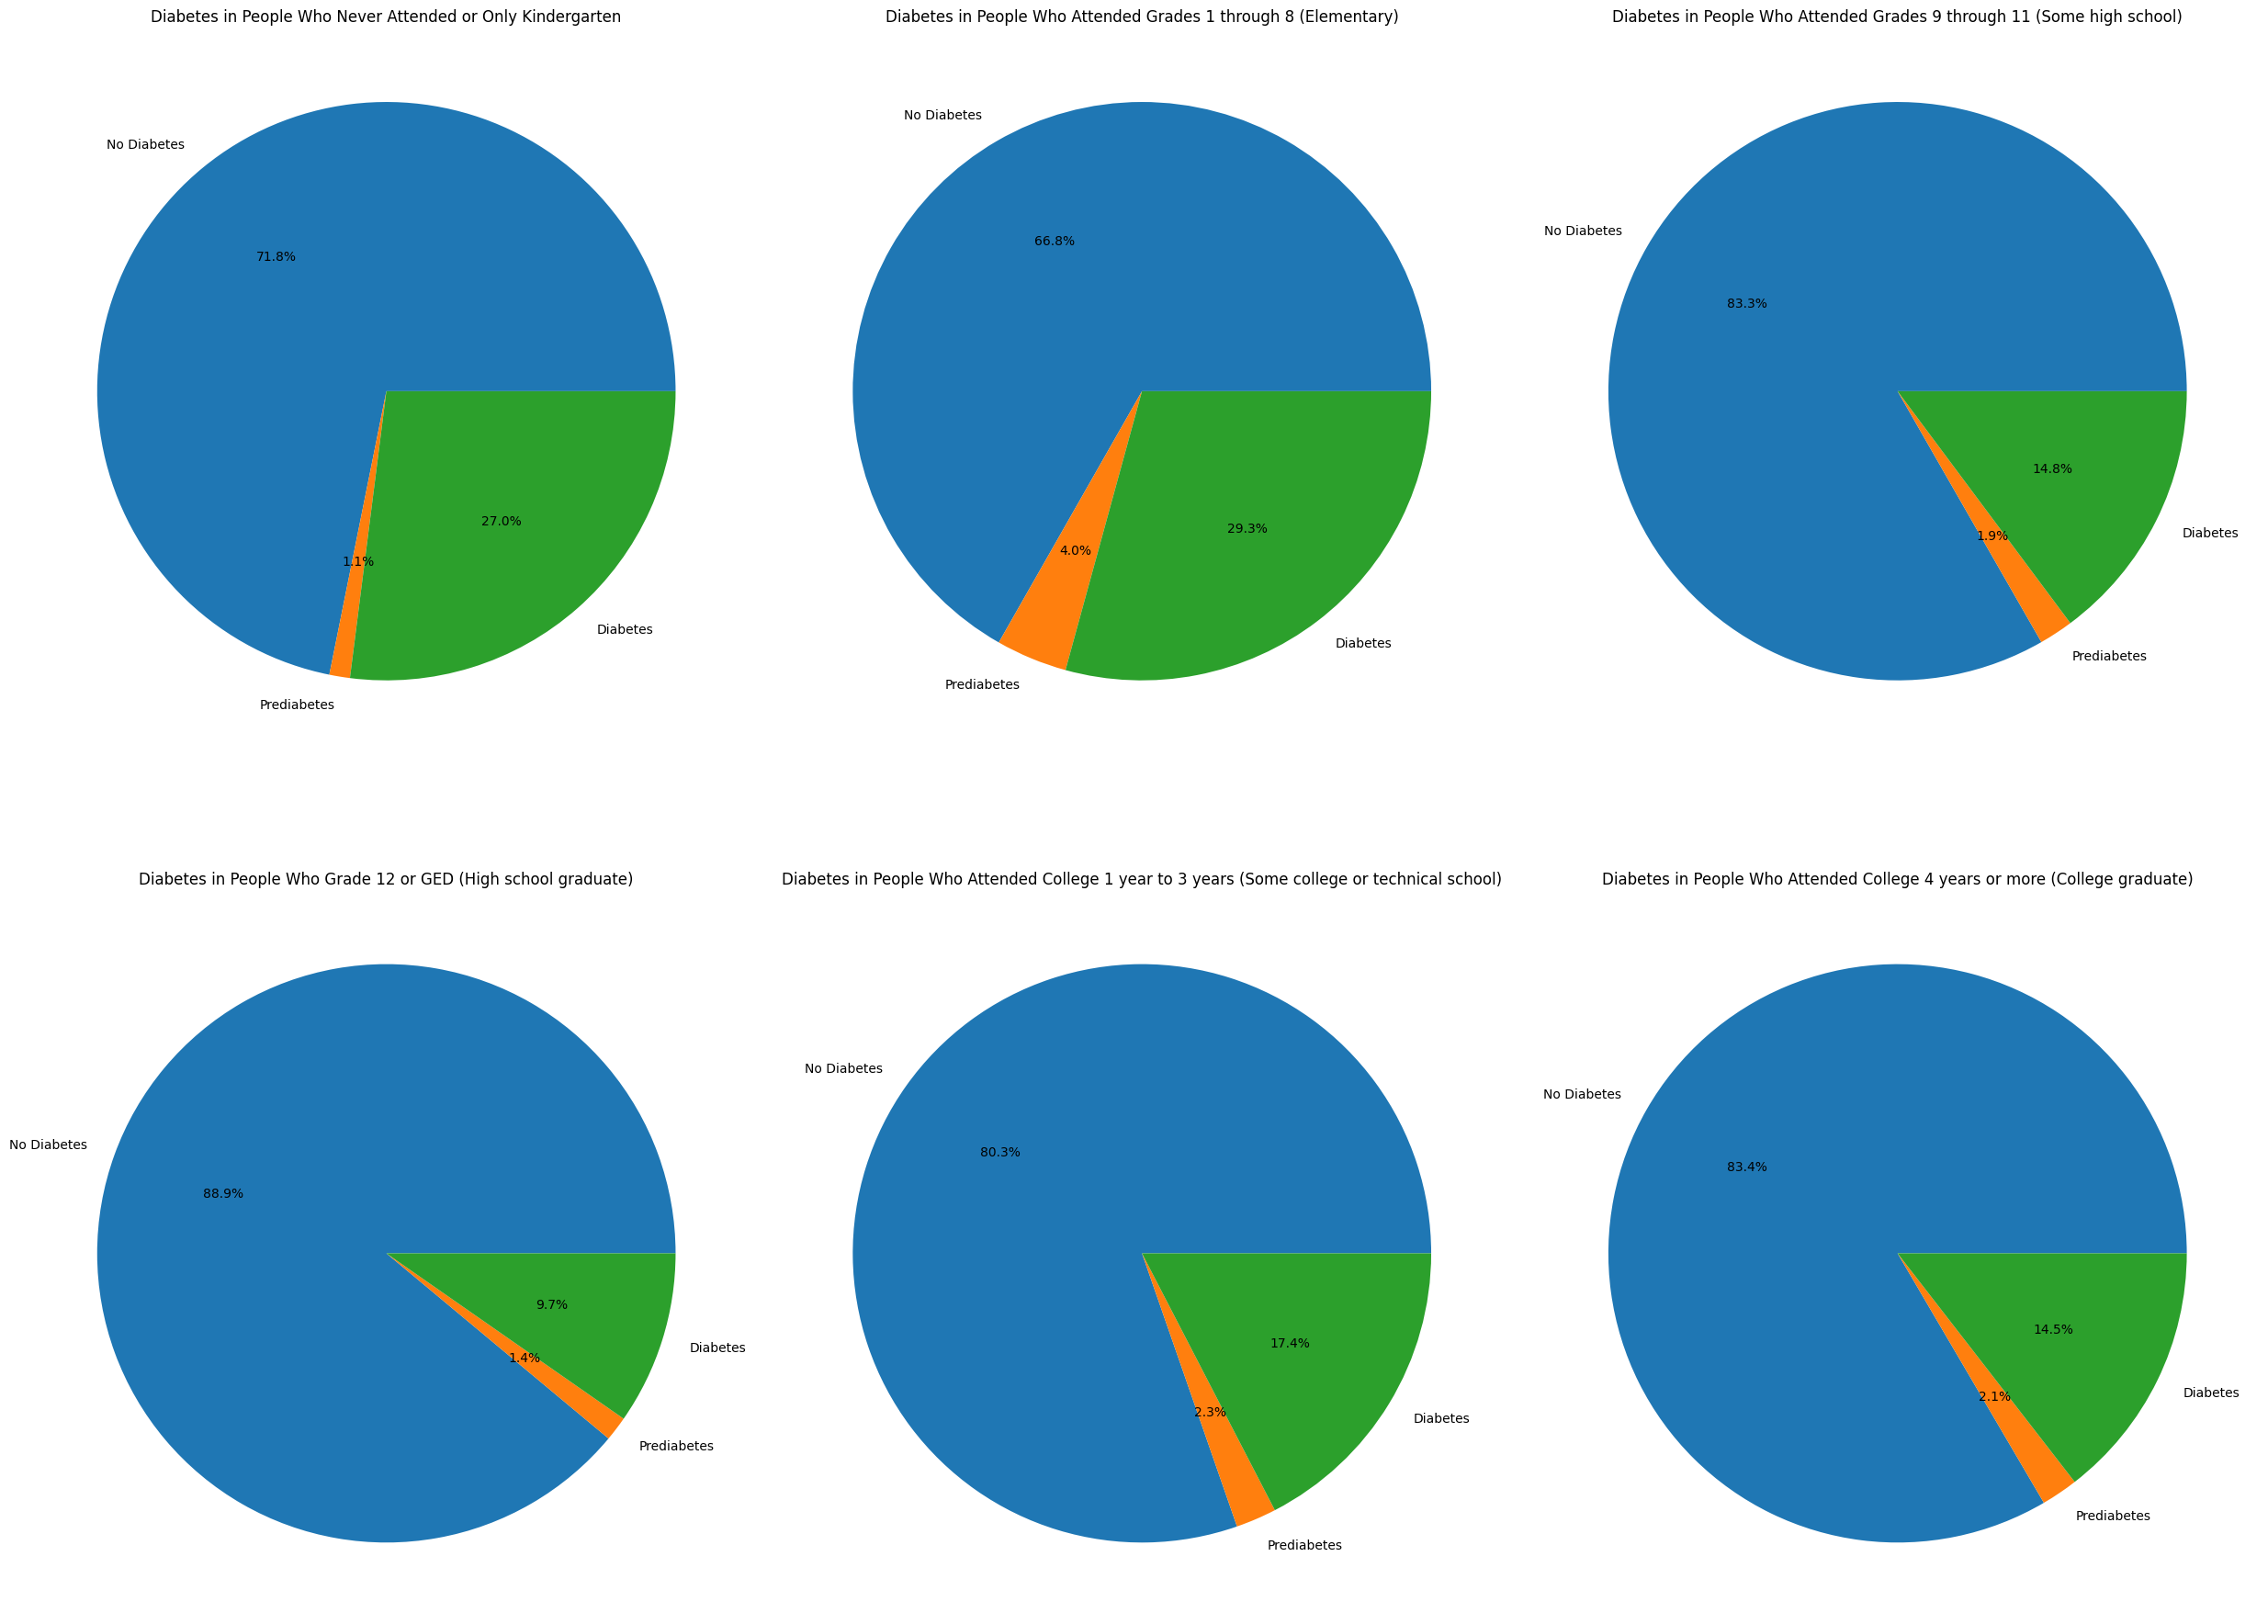

In [121]:
labels = ['No Diabetes','Prediabetes','Diabetes']

data_1 = [len(df_modded[(df_modded['Never Attended or Only Kindergarten']==1) & (df_modded['Diabetes_012'] == 0)]),len(df_modded[(df_modded['Never Attended or Only Kindergarten']==1) & (df_modded['Diabetes_012'] == 1)]), len(df_modded[(df_modded['Never Attended or Only Kindergarten']==1) & (df_modded['Diabetes_012'] == 2)])]

data_2 = [len(df_modded[(df_modded['Grades 1 through 8 (Elementary)']==1) & (df_modded['Diabetes_012'] == 0)]),len(df_modded[(df_modded['Grades 1 through 8 (Elementary)']==1) & (df_modded['Diabetes_012'] == 1)]), len(df_modded[(df_modded['Grades 1 through 8 (Elementary)']==1) & (df_modded['Diabetes_012'] == 2)])]

data_3 = [len(df_modded[(df_modded['Grades 9 through 11 (Some high school)']==1) & (df_modded['Diabetes_012'] == 0)]),len(df_modded[(df_modded['Grades 9 through 11 (Some high school)']==1) & (df_modded['Diabetes_012'] == 1)]), len(df_modded[(df_modded['Grades 9 through 11 (Some high school)']==1) & (df_modded['Diabetes_012'] == 2)])]

data_4 = [len(df_modded[(df_modded['Grade 12 or GED (High school graduate)']==1) & (df_modded['Diabetes_012'] == 0)]),len(df_modded[(df_modded['Grade 12 or GED (High school graduate)']==1) & (df_modded['Diabetes_012'] == 1)]), len(df_modded[(df_modded['Grade 12 or GED (High school graduate)']==1) & (df_modded['Diabetes_012'] == 2)])]

data_3 = [len(df_modded[(df_modded['College 1 year to 3 years (Some college or technical school)']==1) & (df_modded['Diabetes_012'] == 0)]),len(df_modded[(df_modded['College 1 year to 3 years (Some college or technical school)']==1) & (df_modded['Diabetes_012'] == 1)]), len(df_modded[(df_modded['College 1 year to 3 years (Some college or technical school)']==1) & (df_modded['Diabetes_012'] == 2)])]

data_4 = [len(df_modded[(df_modded['College 4 years or more (College graduate)']==1) & (df_modded['Diabetes_012'] == 0)]),len(df_modded[(df_modded['College 4 years or more (College graduate)']==1) & (df_modded['Diabetes_012'] == 1)]), len(df_modded[(df_modded['College 4 years or more (College graduate)']==1) & (df_modded['Diabetes_012'] == 2)])]


fig, axes = plt.subplots(2, 3, figsize=(25, 20))
    

axes[0][0].pie(data_1, labels=labels,autopct='%1.1f%%')
axes[0][0].set_title('Diabetes in People Who Never Attended or Only Kindergarten')

axes[0][1].pie(data_2, labels=labels,autopct='%1.1f%%')
axes[0][1].set_title('Diabetes in People Who Attended Grades 1 through 8 (Elementary)')

axes[0][2].pie(data_3, labels=labels,autopct='%1.1f%%')
axes[0][2].set_title('Diabetes in People Who Attended Grades 9 through 11 (Some high school)')

axes[1][0].pie(data_4, labels=labels,autopct='%1.1f%%')
axes[1][0].set_title('Diabetes in People Who Grade 12 or GED (High school graduate)')

axes[1][1].pie(data_5, labels=labels,autopct='%1.1f%%')
axes[1][1].set_title('Diabetes in People Who Attended College 1 year to 3 years (Some college or technical school)')

axes[1][2].pie(data_6, labels=labels,autopct='%1.1f%%')
axes[1][2].set_title('Diabetes in People Who Attended College 4 years or more (College graduate)')

plt.tight_layout()
plt.show()

### Income
#### Income scale 1-8. 1 = less than $10,000 5 = less than $35,000 8 = $75,000 or more 

The higher the income, the lower the risk of diabetes and prediabetes

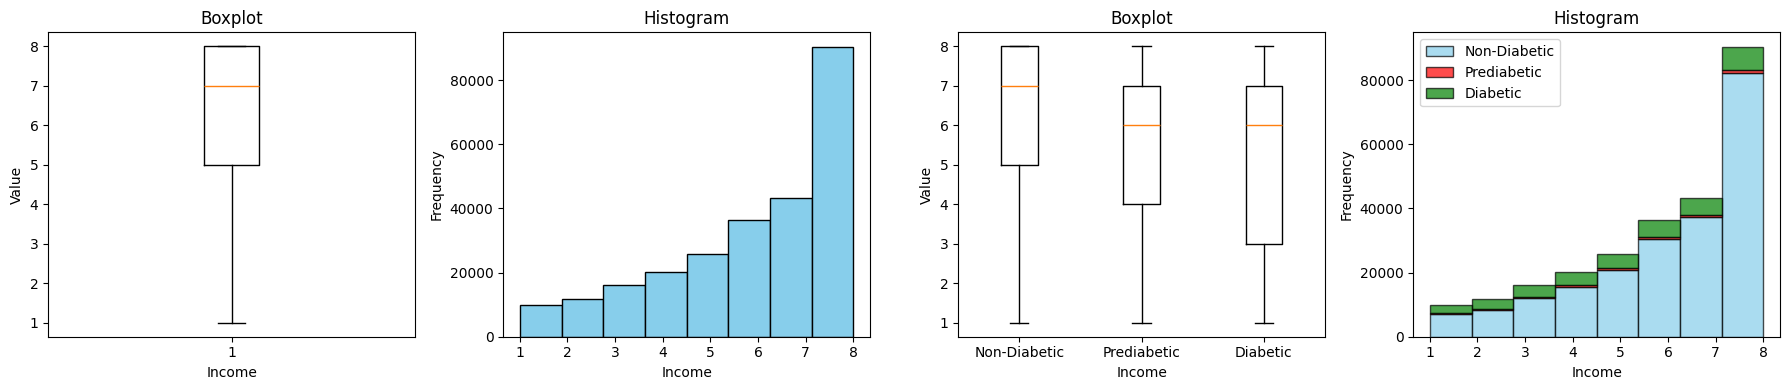

Mean: 6.053874960580258
Standard Deviation: 2.0711475662715184
Median: 7.0
Min: 1.0
Max: 8.0


In [101]:
view_continuous(df,'Income',8)
col_summary(df,'Income')

In [102]:
df_modded = pd.get_dummies(df_modded,columns=['Income'],dtype=int)

In [103]:
df_modded = df_modded.rename(columns={'Income_1.0': 'Earns Less than $10,000 Annually', 'Income_2.0': 'Earns $10,000-$14,999 Annually', 'Income_3.0': 'Earns $15,000-$19,999 Annually', 'Income_4.0': 'Earns $20,000-$24,999 Annually', 'Income_5.0': 'Earns $25,000-$34,999 Annually'
                                      , 'Income_6.0': 'Earns $35,000-$49,999 Annually', 'Income_7.0': 'Earns $50,000-$74,999 Annually', 'Income_8.0': 'Earns More than $75,000 Annually'})

In [104]:
df_modded

Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...              ...     ...       ...        ...   ...     ...     ...   
253675           0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676           2.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677           0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678           0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679           2.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  \
0                        0.0           0.0     0.0  ...   
1                        0.0           1.0     0.0  ...   
2                        0.0           0.0     1.0  ...   
3                        0.0           1.0     1.0  ...   
4                        0.0           1.0     1.0  ...   
...                      ...           ...     ...  ...   
253675                   0.0           0.0     1.0  ...   
253676                   0.0           0.0     0.0  ...   
253677                   0.0           1.0     1.0  ...   
253678                   0.0           0.0     1.0  ...   
253679                   1.0           1.0     1.0  ...   

        College 1 year to 3 years (Some college or technical school)  \
0                                                       0              
1                                                       0              
2                                                       0              
3                                                       0              
4                                                       1              
...                                                   ...              
253675                                                  0              
253676                                                  0              
253677                                                  1              
253678                                                  1              
253679                                                  0              

        College 4 years or more (College graduate)  \
0                                                0   
1                                                1   
2                                                0   
3                                                0   
4                                                0   
...                                            ...   
253675                                           1   
253676                                           0   
253677                                           0   
253678                                           0   
253679                                           1   

        Earns Less than $10,000 Annually  Earns $10,000-$14,999 Annually  \
0                                      0                               0   
1                                      1                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               0   
...                                  ...                             ...   
253675                                 0                               0   
253676                                 0                               0   
253677                                 0                               1   
253678                                 1                               0   
253679                                 0        

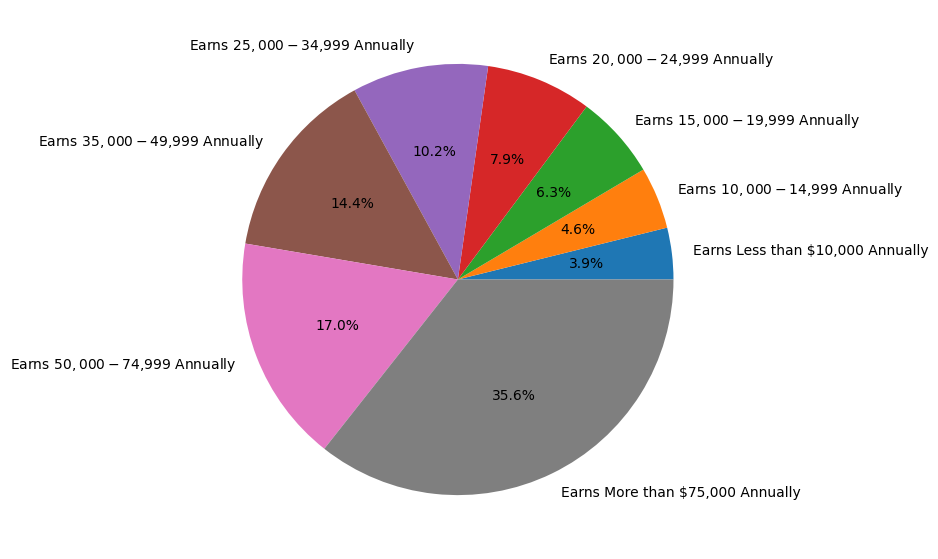

In [105]:
labels = ['Earns Less than $10,000 Annually', 'Earns $10,000-$14,999 Annually', 'Earns $15,000-$19,999 Annually', 'Earns $20,000-$24,999 Annually',
          'Earns $25,000-$34,999 Annually', 'Earns $35,000-$49,999 Annually', 'Earns $50,000-$74,999 Annually', 'Earns More than $75,000 Annually']
data = [len(df_modded[df_modded['Earns Less than $10,000 Annually']==1]),len(df_modded[df_modded['Earns $10,000-$14,999 Annually']==1]),len(df_modded[df_modded['Earns $15,000-$19,999 Annually']==1])
        ,len(df_modded[df_modded['Earns $20,000-$24,999 Annually']==1]) ,len(df_modded[df_modded['Earns $25,000-$34,999 Annually']==1]) ,len(df_modded[df_modded['Earns $35,000-$49,999 Annually']==1])
        ,len(df_modded[df_modded['Earns $50,000-$74,999 Annually']==1]) ,len(df_modded[df_modded['Earns More than $75,000 Annually']==1])]

fig = plt.figure(figsize=(10, 7))
plt.pie(data, labels=labels,autopct='%1.1f%%')

# show plot
plt.show()

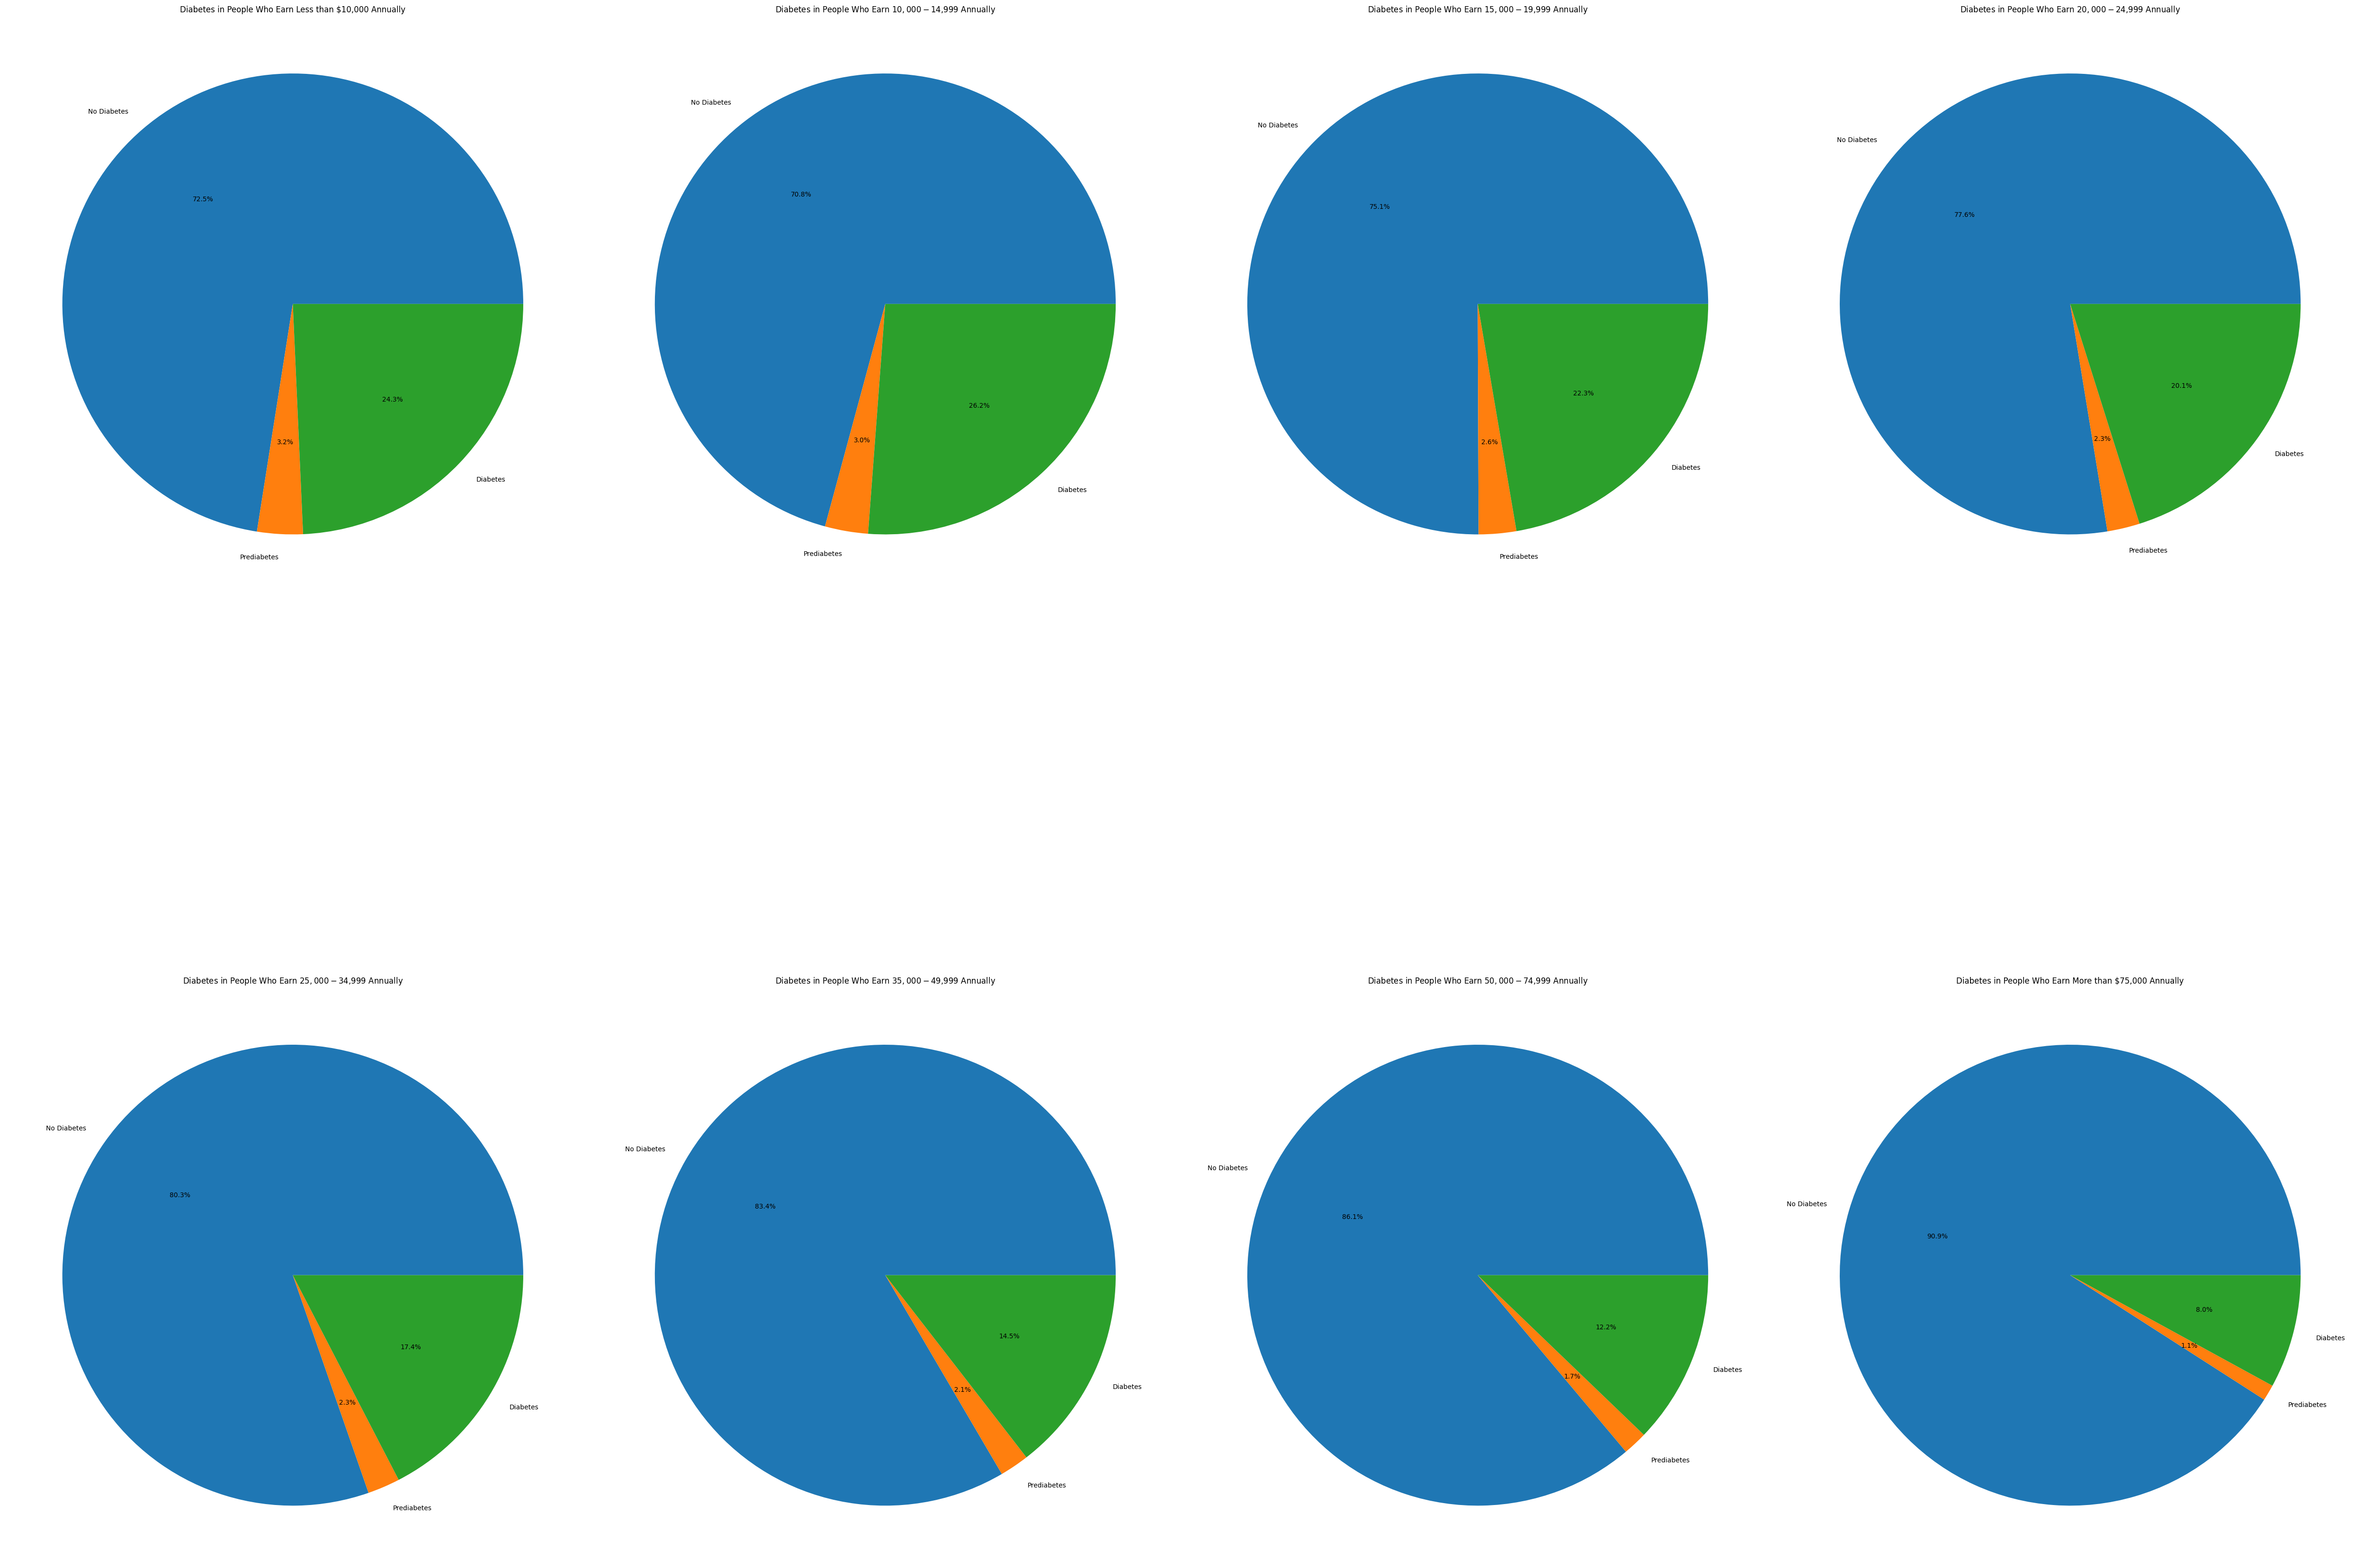

In [106]:
labels = ['No Diabetes','Prediabetes','Diabetes']

data_1 = [len(df_modded[(df_modded['Earns Less than $10,000 Annually']==1) & (df_modded['Diabetes_012'] == 0)]),len(df_modded[(df_modded['Earns Less than $10,000 Annually']==1) & (df_modded['Diabetes_012'] == 1)]), len(df_modded[(df_modded['Earns Less than $10,000 Annually']==1) & (df_modded['Diabetes_012'] == 2)])]

data_2 = [len(df_modded[(df_modded['Earns $10,000-$14,999 Annually']==1) & (df_modded['Diabetes_012'] == 0)]),len(df_modded[(df_modded['Earns $10,000-$14,999 Annually']==1) & (df_modded['Diabetes_012'] == 1)]), len(df_modded[(df_modded['Earns $10,000-$14,999 Annually']==1) & (df_modded['Diabetes_012'] == 2)])]

data_3 = [len(df_modded[(df_modded['Earns $15,000-$19,999 Annually']==1) & (df_modded['Diabetes_012'] == 0)]),len(df_modded[(df_modded['Earns $15,000-$19,999 Annually']==1) & (df_modded['Diabetes_012'] == 1)]), len(df_modded[(df_modded['Earns $15,000-$19,999 Annually']==1) & (df_modded['Diabetes_012'] == 2)])]

data_4 = [len(df_modded[(df_modded['Earns $20,000-$24,999 Annually']==1) & (df_modded['Diabetes_012'] == 0)]),len(df_modded[(df_modded['Earns $20,000-$24,999 Annually']==1) & (df_modded['Diabetes_012'] == 1)]), len(df_modded[(df_modded['Earns $20,000-$24,999 Annually']==1) & (df_modded['Diabetes_012'] == 2)])]

data_5 = [len(df_modded[(df_modded['Earns $25,000-$34,999 Annually']==1) & (df_modded['Diabetes_012'] == 0)]),len(df_modded[(df_modded['Earns $25,000-$34,999 Annually']==1) & (df_modded['Diabetes_012'] == 1)]), len(df_modded[(df_modded['Earns $25,000-$34,999 Annually']==1) & (df_modded['Diabetes_012'] == 2)])]

data_6 = [len(df_modded[(df_modded['Earns $35,000-$49,999 Annually']==1) & (df_modded['Diabetes_012'] == 0)]),len(df_modded[(df_modded['Earns $35,000-$49,999 Annually']==1) & (df_modded['Diabetes_012'] == 1)]), len(df_modded[(df_modded['Earns $35,000-$49,999 Annually']==1) & (df_modded['Diabetes_012'] == 2)])]

data_7 = [len(df_modded[(df_modded['Earns $50,000-$74,999 Annually']==1) & (df_modded['Diabetes_012'] == 0)]),len(df_modded[(df_modded['Earns $50,000-$74,999 Annually']==1) & (df_modded['Diabetes_012'] == 1)]), len(df_modded[(df_modded['Earns $50,000-$74,999 Annually']==1) & (df_modded['Diabetes_012'] == 2)])]

data_8 = [len(df_modded[(df_modded['Earns More than $75,000 Annually']==1) & (df_modded['Diabetes_012'] == 0)]),len(df_modded[(df_modded['Earns More than $75,000 Annually']==1) & (df_modded['Diabetes_012'] == 1)]), len(df_modded[(df_modded['Earns More than $75,000 Annually']==1) & (df_modded['Diabetes_012'] == 2)])]


fig, axes = plt.subplots(2, 4, figsize=(50, 50))
    

axes[0][0].pie(data_1, labels=labels,autopct='%1.1f%%')
axes[0][0].set_title('Diabetes in People Who Earn Less than $10,000 Annually')

axes[0][1].pie(data_2, labels=labels,autopct='%1.1f%%')
axes[0][1].set_title('Diabetes in People Who Earn $10,000-$14,999 Annually')

axes[0][2].pie(data_3, labels=labels,autopct='%1.1f%%')
axes[0][2].set_title('Diabetes in People Who Earn $15,000-$19,999 Annually')

axes[0][3].pie(data_4, labels=labels,autopct='%1.1f%%')
axes[0][3].set_title('Diabetes in People Who Earn $20,000-$24,999 Annually')

axes[1][0].pie(data_5, labels=labels,autopct='%1.1f%%')
axes[1][0].set_title('Diabetes in People Who Earn $25,000-$34,999 Annually')

axes[1][1].pie(data_6, labels=labels,autopct='%1.1f%%')
axes[1][1].set_title('Diabetes in People Who Earn $35,000-$49,999 Annually')

axes[1][2].pie(data_7, labels=labels,autopct='%1.1f%%')
axes[1][2].set_title('Diabetes in People Who Earn $50,000-$74,999 Annually')

axes[1][3].pie(data_8, labels=labels,autopct='%1.1f%%')
axes[1][3].set_title('Diabetes in People Who Earn More than $75,000 Annually')

plt.tight_layout()
plt.show()

## Correlation Matrix

Naturally, general health is the best indicator of diabetes, but factors like income, education, and blood pressure play important roles as can be seen.

No feature is too influential, so we can keep all of them

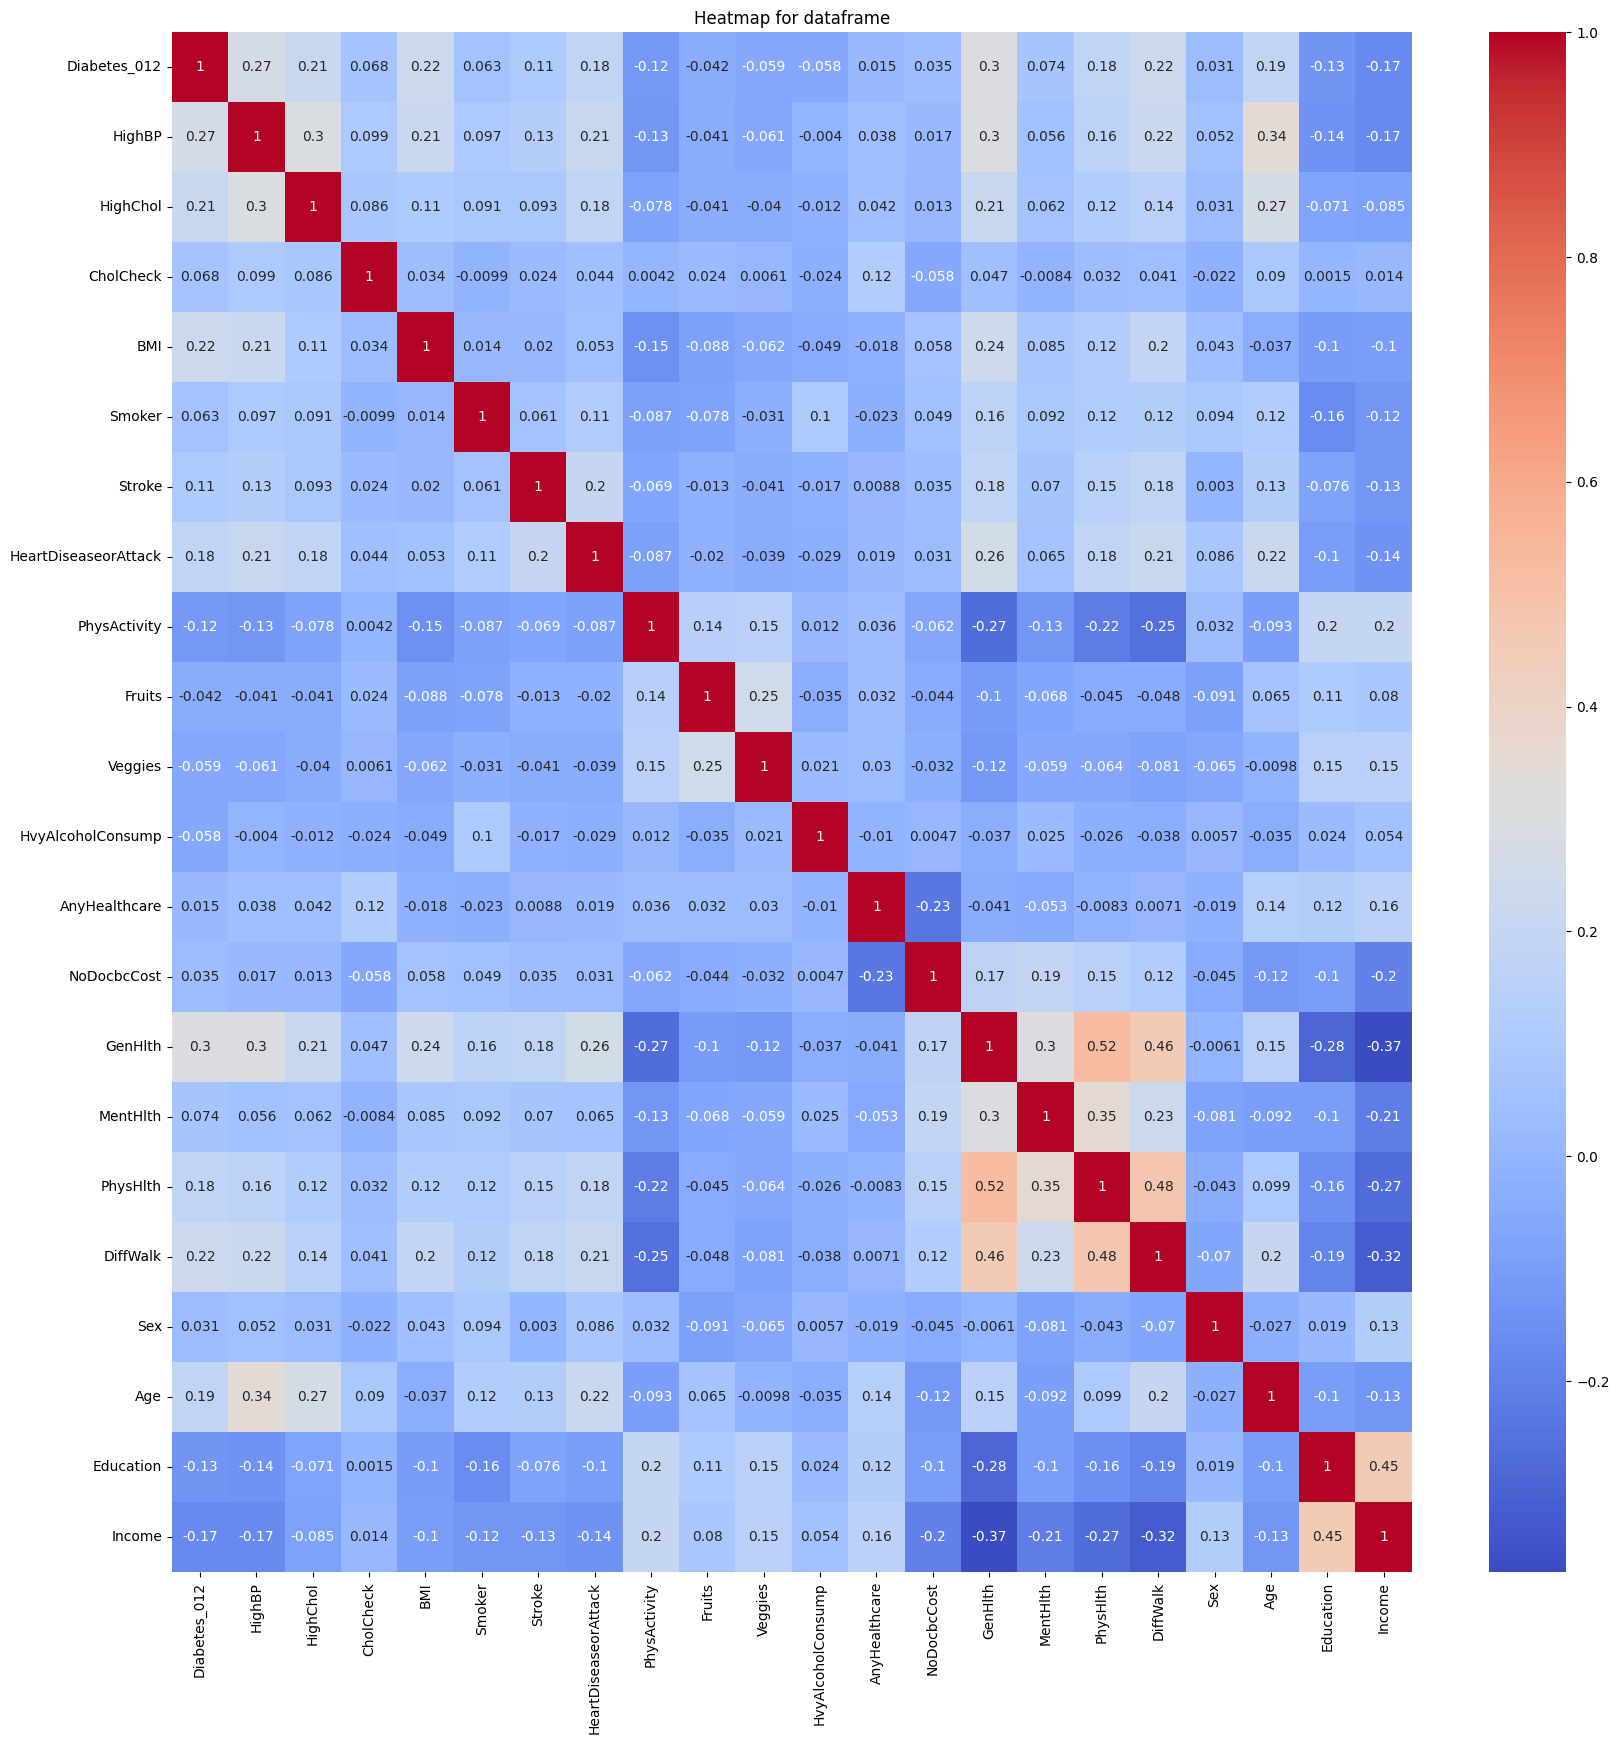

In [107]:
draw_heat_graph(df)

In [108]:
df_trimmed = df.drop(['CholCheck','Smoker','Fruits','Veggies','HvyAlcoholConsump','AnyHealthcare','NoDocbcCost','MentHlth','Sex','PhysHlth'],axis=1)

# Scale Values

In [109]:
df_test = df_trimmed.copy()

## Function Definitions

In [110]:
def scale_standard(df,col):
    df[col] = StandardScaler().fit_transform(df[col].values.reshape(-1, 1))

In [111]:
def scale_robust(df,col):
    df[col] = RobustScaler().fit_transform(df[col].values.reshape(-1, 1))

In [112]:
def scale_quantile(df,col):
    df[col] = QuantileTransformer(n_quantiles=len(df[col].unique()),output_distribution='normal').fit_transform(df[col].values.reshape(-1, 1))

In [113]:
def scale_log(df,col):
    df[col] = np.log(df[col])

The yeo-johnson transformer was used to reduce skew on the BMI column then followed up by a robust scaler

Other scalers were used but the combination in the code possessed the best results

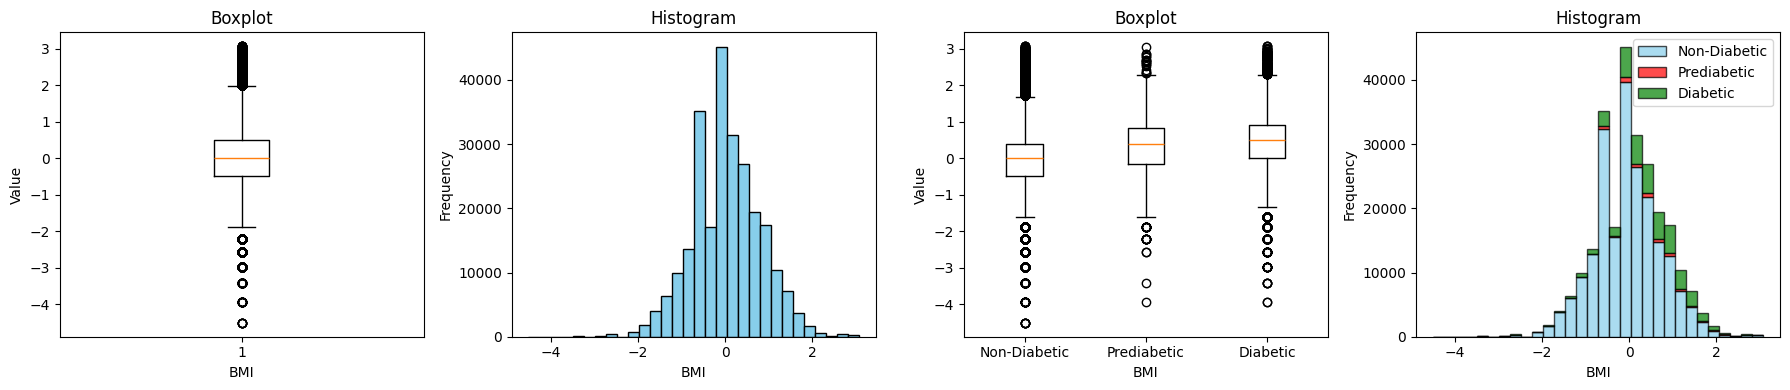

In [114]:
#len(df_test['BMI'].unique())
df_modded['BMI'] = PowerTransformer(method='yeo-johnson').fit_transform(df_modded[['BMI']])
scale_robust(df_modded,'BMI')
#scale_log(df_test,'BMI')
view_continuous(df_modded,'BMI')

In [115]:
df_modded

Diabetes_012  HighBP  HighChol  CholCheck       BMI  Smoker  Stroke  \
0                0.0     1.0       1.0        1.0  1.316755     1.0     0.0   
1                0.0     0.0       0.0        0.0 -0.312639     1.0     0.0   
2                0.0     1.0       1.0        1.0  0.140916     0.0     0.0   
3                0.0     1.0       0.0        1.0  0.000000     0.0     0.0   
4                0.0     1.0       1.0        1.0 -0.486739     0.0     0.0   
...              ...     ...       ...        ...       ...     ...     ...   
253675           0.0     1.0       1.0        1.0  1.633059     0.0     0.0   
253676           2.0     1.0       1.0        1.0 -1.893247     0.0     0.0   
253677           0.0     0.0       0.0        1.0  0.140916     0.0     0.0   
253678           0.0     1.0       0.0        1.0 -0.674597     0.0     0.0   
253679           2.0     1.0       1.0        1.0 -0.312639     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  \
0                        0.0           0.0     0.0  ...   
1                        0.0           1.0     0.0  ...   
2                        0.0           0.0     1.0  ...   
3                        0.0           1.0     1.0  ...   
4                        0.0           1.0     1.0  ...   
...                      ...           ...     ...  ...   
253675                   0.0           0.0     1.0  ...   
253676                   0.0           0.0     0.0  ...   
253677                   0.0           1.0     1.0  ...   
253678                   0.0           0.0     1.0  ...   
253679                   1.0           1.0     1.0  ...   

        College 1 year to 3 years (Some college or technical school)  \
0                                                       0              
1                                                       0              
2                                                       0              
3                                                       0              
4                                                       1              
...                                                   ...              
253675                                                  0              
253676                                                  0              
253677                                                  1              
253678                                                  1              
253679                                                  0              

        College 4 years or more (College graduate)  \
0                                                0   
1                                                1   
2                                                0   
3                                                0   
4                                                0   
...                                            ...   
253675                                           1   
253676                                           0   
253677                                           0   
253678                                           0   
253679                                           1   

        Earns Less than $10,000 Annually  Earns $10,000-$14,999 Annually  \
0                                      0                               0   
1                                      1                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               0   
...                                  ...                             ...   
253675                                 0                               0   
253676                                 0                               0   
253677                                 0                               1   
253678                                 1                               0   


In [116]:
df_modded.to_csv('Phase 2 data.csv')

In [117]:
len(df_modded.columns())

TypeError: 'Index' object is not callable